In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df= pd.read_excel('PD_modelling_dataset.xlsx')

In [4]:
df.head(2)

userid  default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0  4567129.0      0.0                    0.0                     0.0   
1  2635118.0      0.0                    0.0                     0.0   

   acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
0                      0.0                       0.0   
1                      0.0                       0.0   

   acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
0                               0.0          1.0                     1.0   
1                               NaN          1.0                     1.0   

   acct_worst_status_12_24m  acct_worst_status_3_6m  acct_worst_status_6_12m  \
0                       NaN                     1.0                      NaN   
1                       1.0                     1.0                      1.0   

    age  avg_payment_span_0_12m  avg_payment_span_0_3m    merchant_category  \
0  20.0               12.692308               8.333333  Dietary supplements   
1  50.0               25.833333              25.000000    Books & Magazines   

    merchant_group  has_paid  max_paid_inv_0_12m  max_paid_inv_0_24m  \
0  Health & Beauty       1.0             31638.0             31638.0   
1    Entertainment       1.0             13749.0             13749.0   

  name_in_email  num_active_div_by_paid_inv_0_12m  num_active_inv  \
0      no_match                          0.153846             2.0   
1           F+L                          0.000000             0.0   

   num_arch_dc_0_12m  num_arch_dc_12_24m  num_arch_ok_0_12m  \
0                0.0                 0.0               13.0   
1                0.0                 0.0                9.0   

   num_arch_ok_12_24m  num_arch_rem_0_12m  status_max_archived_0_6_months  \
0                14.0                 0.0                             1.0   
1                19.0                 3.0                             1.0   

   status_max_archived_0_12_months  status_max_archived_0_24_months  \
0                              1.0                              1.0   
1                              2.0                              2.0   

   recovery_debt  sum_capital_paid_acct_0_12m  sum_capital_paid_acct_12_24m  \
0            0.0                          0.0                           0.0   
1            0.0                          0.0                           0.0   

   sum_paid_inv_0_12m  time_hours  
0            178839.0    9.653333  
1             49014.0   13.181389

In [5]:
df.drop(['userid'],axis='columns', inplace=True)
df.head(2)

default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0      0.0                    0.0                     0.0   
1      0.0                    0.0                     0.0   

   acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
0                      0.0                       0.0   
1                      0.0                       0.0   

   acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
0                               0.0          1.0                     1.0   
1                               NaN          1.0                     1.0   

   acct_worst_status_12_24m  acct_worst_status_3_6m  acct_worst_status_6_12m  \
0                       NaN                     1.0                      NaN   
1                       1.0                     1.0                      1.0   

    age  avg_payment_span_0_12m  avg_payment_span_0_3m    merchant_category  \
0  20.0               12.692308               8.333333  Dietary supplements   
1  50.0               25.833333              25.000000    Books & Magazines   

    merchant_group  has_paid  max_paid_inv_0_12m  max_paid_inv_0_24m  \
0  Health & Beauty       1.0             31638.0             31638.0   
1    Entertainment       1.0             13749.0             13749.0   

  name_in_email  num_active_div_by_paid_inv_0_12m  num_active_inv  \
0      no_match                          0.153846             2.0   
1           F+L                          0.000000             0.0   

   num_arch_dc_0_12m  num_arch_dc_12_24m  num_arch_ok_0_12m  \
0                0.0                 0.0               13.0   
1                0.0                 0.0                9.0   

   num_arch_ok_12_24m  num_arch_rem_0_12m  status_max_archived_0_6_months  \
0                14.0                 0.0                             1.0   
1                19.0                 3.0                             1.0   

   status_max_archived_0_12_months  status_max_archived_0_24_months  \
0                              1.0                              1.0   
1                              2.0                              2.0   

   recovery_debt  sum_capital_paid_acct_0_12m  sum_capital_paid_acct_12_24m  \
0            0.0                          0.0                           0.0   
1            0.0                          0.0                           0.0   

   sum_paid_inv_0_12m  time_hours  
0            178839.0    9.653333  
1             49014.0   13.181389

In [6]:
df.shape

(99979, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99979 entries, 0 to 99978
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   default                           89977 non-null  float64
 1   acct_amt_added_12_24m             99977 non-null  float64
 2   acct_days_in_dc_12_24m            88141 non-null  float64
 3   acct_days_in_rem_12_24m           88141 non-null  float64
 4   acct_days_in_term_12_24m          88141 non-null  float64
 5   acct_incoming_debt_vs_paid_0_24m  40662 non-null  float64
 6   acct_status                       45604 non-null  float64
 7   acct_worst_status_0_3m            45604 non-null  float64
 8   acct_worst_status_12_24m          33216 non-null  float64
 9   acct_worst_status_3_6m            42275 non-null  float64
 10  acct_worst_status_6_12m           39627 non-null  float64
 11  age                               99977 non-null  float64
 12  avg_

In [8]:
df.duplicated().sum().sum()

2806

In [9]:
df.isnull().sum().sum()

700139

In [10]:
total_missing = df.isnull().sum().sum()
total_entries = df.size
percentage_missing = (total_missing / total_entries) * 100
print(f"Total percentage of missing values: {percentage_missing:.2f}%")

Total percentage of missing values: 20.01%


In [11]:
total_complete = df.notnull().sum().sum()
total_entries = df.size
percentage_complete = (total_complete / total_entries) * 100
print(f"Total percentage of complete values: {percentage_complete:.2f}%")

Total percentage of complete values: 79.99%


In [12]:
pd.set_option('display.float_format','{:.2f}'.format)
df.describe(include='all')

default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
count  89977.00               99977.00                88141.00   
unique      NaN                    NaN                     NaN   
top         NaN                    NaN                     NaN   
freq        NaN                    NaN                     NaN   
mean       0.13               12255.03                    0.36   
std       33.34               35481.33                   40.29   
min        0.00                   0.00                    0.00   
25%        0.00                   0.00                    0.00   
50%        0.00                   0.00                    0.00   
75%        0.00                4937.00                    0.00   
max    10000.00             1128775.00                11836.00   

        acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
count                  88141.00                  88141.00   
unique                      NaN                       NaN   
top                         NaN                       NaN   
freq                        NaN                       NaN   
mean                       5.18                      0.42   
std                       45.94                     39.97   
min                        0.00                      0.00   
25%                        0.00                      0.00   
50%                        0.00                      0.00   
75%                        0.00                      0.00   
max                    11836.00                  11836.00   

        acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
count                           40662.00     45604.00                45604.00   
unique                               NaN          NaN                     NaN   
top                                  NaN          NaN                     NaN   
freq                                 NaN          NaN                     NaN   
mean                                2.79         2.23                    2.37   
std                               295.33       254.61                  254.61   
min                                 0.00         1.00                    1.00   
25%                                 0.00         1.00                    1.00   
50%                                 0.15         1.00                    1.00   
75%                                 0.66         1.00                    1.00   
max                             59315.00     54373.00                54373.00   

        acct_worst_status_12_24m  acct_worst_status_3_6m  \
count                   33216.00                42275.00   
unique                       NaN                     NaN   
top                          NaN                     NaN   
freq                         NaN                     NaN   
mean                        3.35                    2.55   
std                       366.30                  280.63   
min                         1.00                    1.00   
25%                         1.00                    1.00   
50%                         1.00                    1.00   
75%                         2.00                    1.00   
max                     66761.00                57702.00   

        acct_worst_status_6_12m      age  avg_payment_span_0_12m  \
count                  39627.00 99977.00                76141.00   
unique                      NaN      NaN                     NaN   
top                         NaN      NaN                     NaN   
freq                        NaN      NaN                     NaN   
mean                       2.78    36.02                   18.28   
std                      303.16    13.00                   87.25   
min                        1.00     0.00                    0.00   
25%                        1.00    25.00                   10.80   
50%                        1.00    34.00                   14.91   
75%                        1.00    45.00                   21.00   
max                    60350.00   100.00

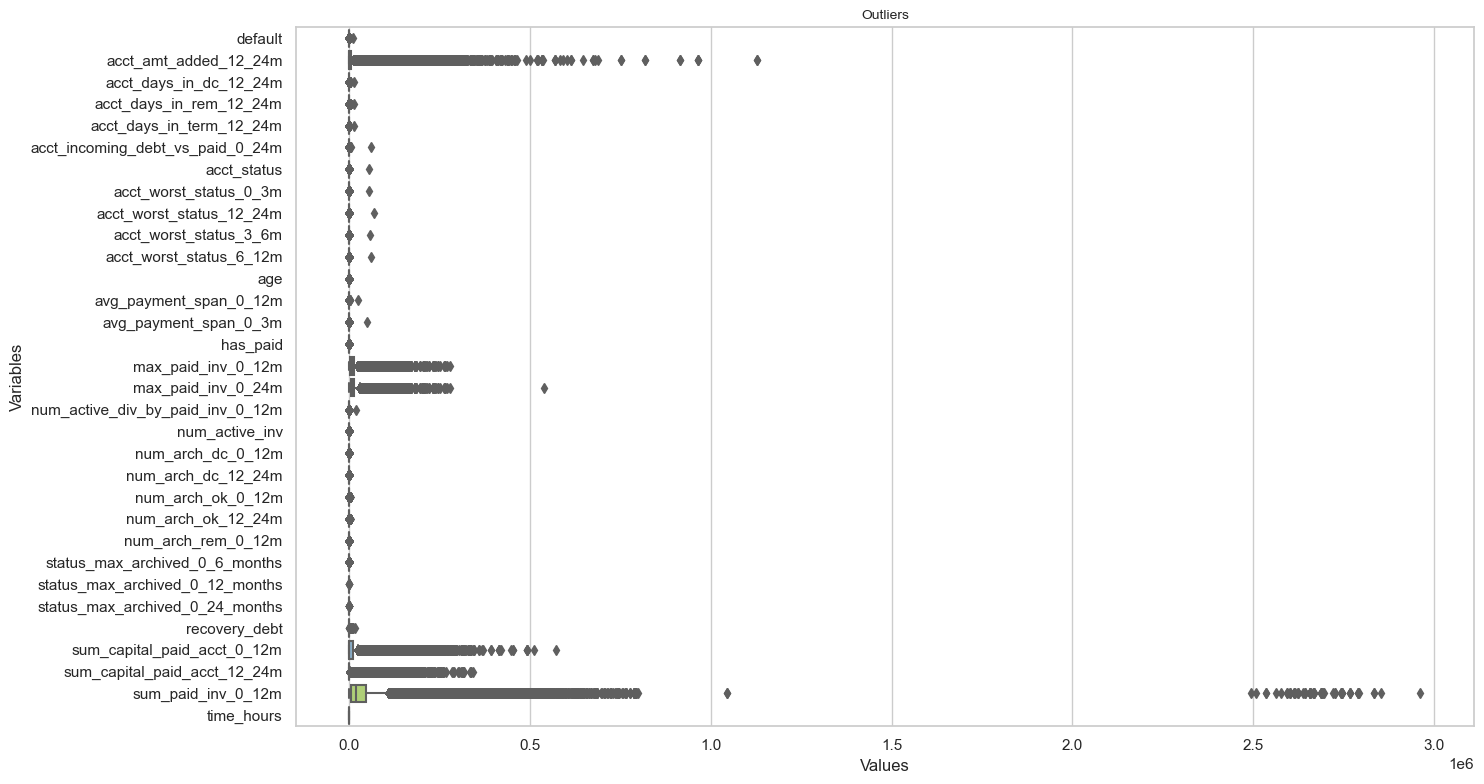

In [13]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient='h', palette='Set3')
plt.title('Outliers', fontsize=10)
plt.xlabel('Values')
plt.ylabel('Variables')
plt.tight_layout()
plt.show();

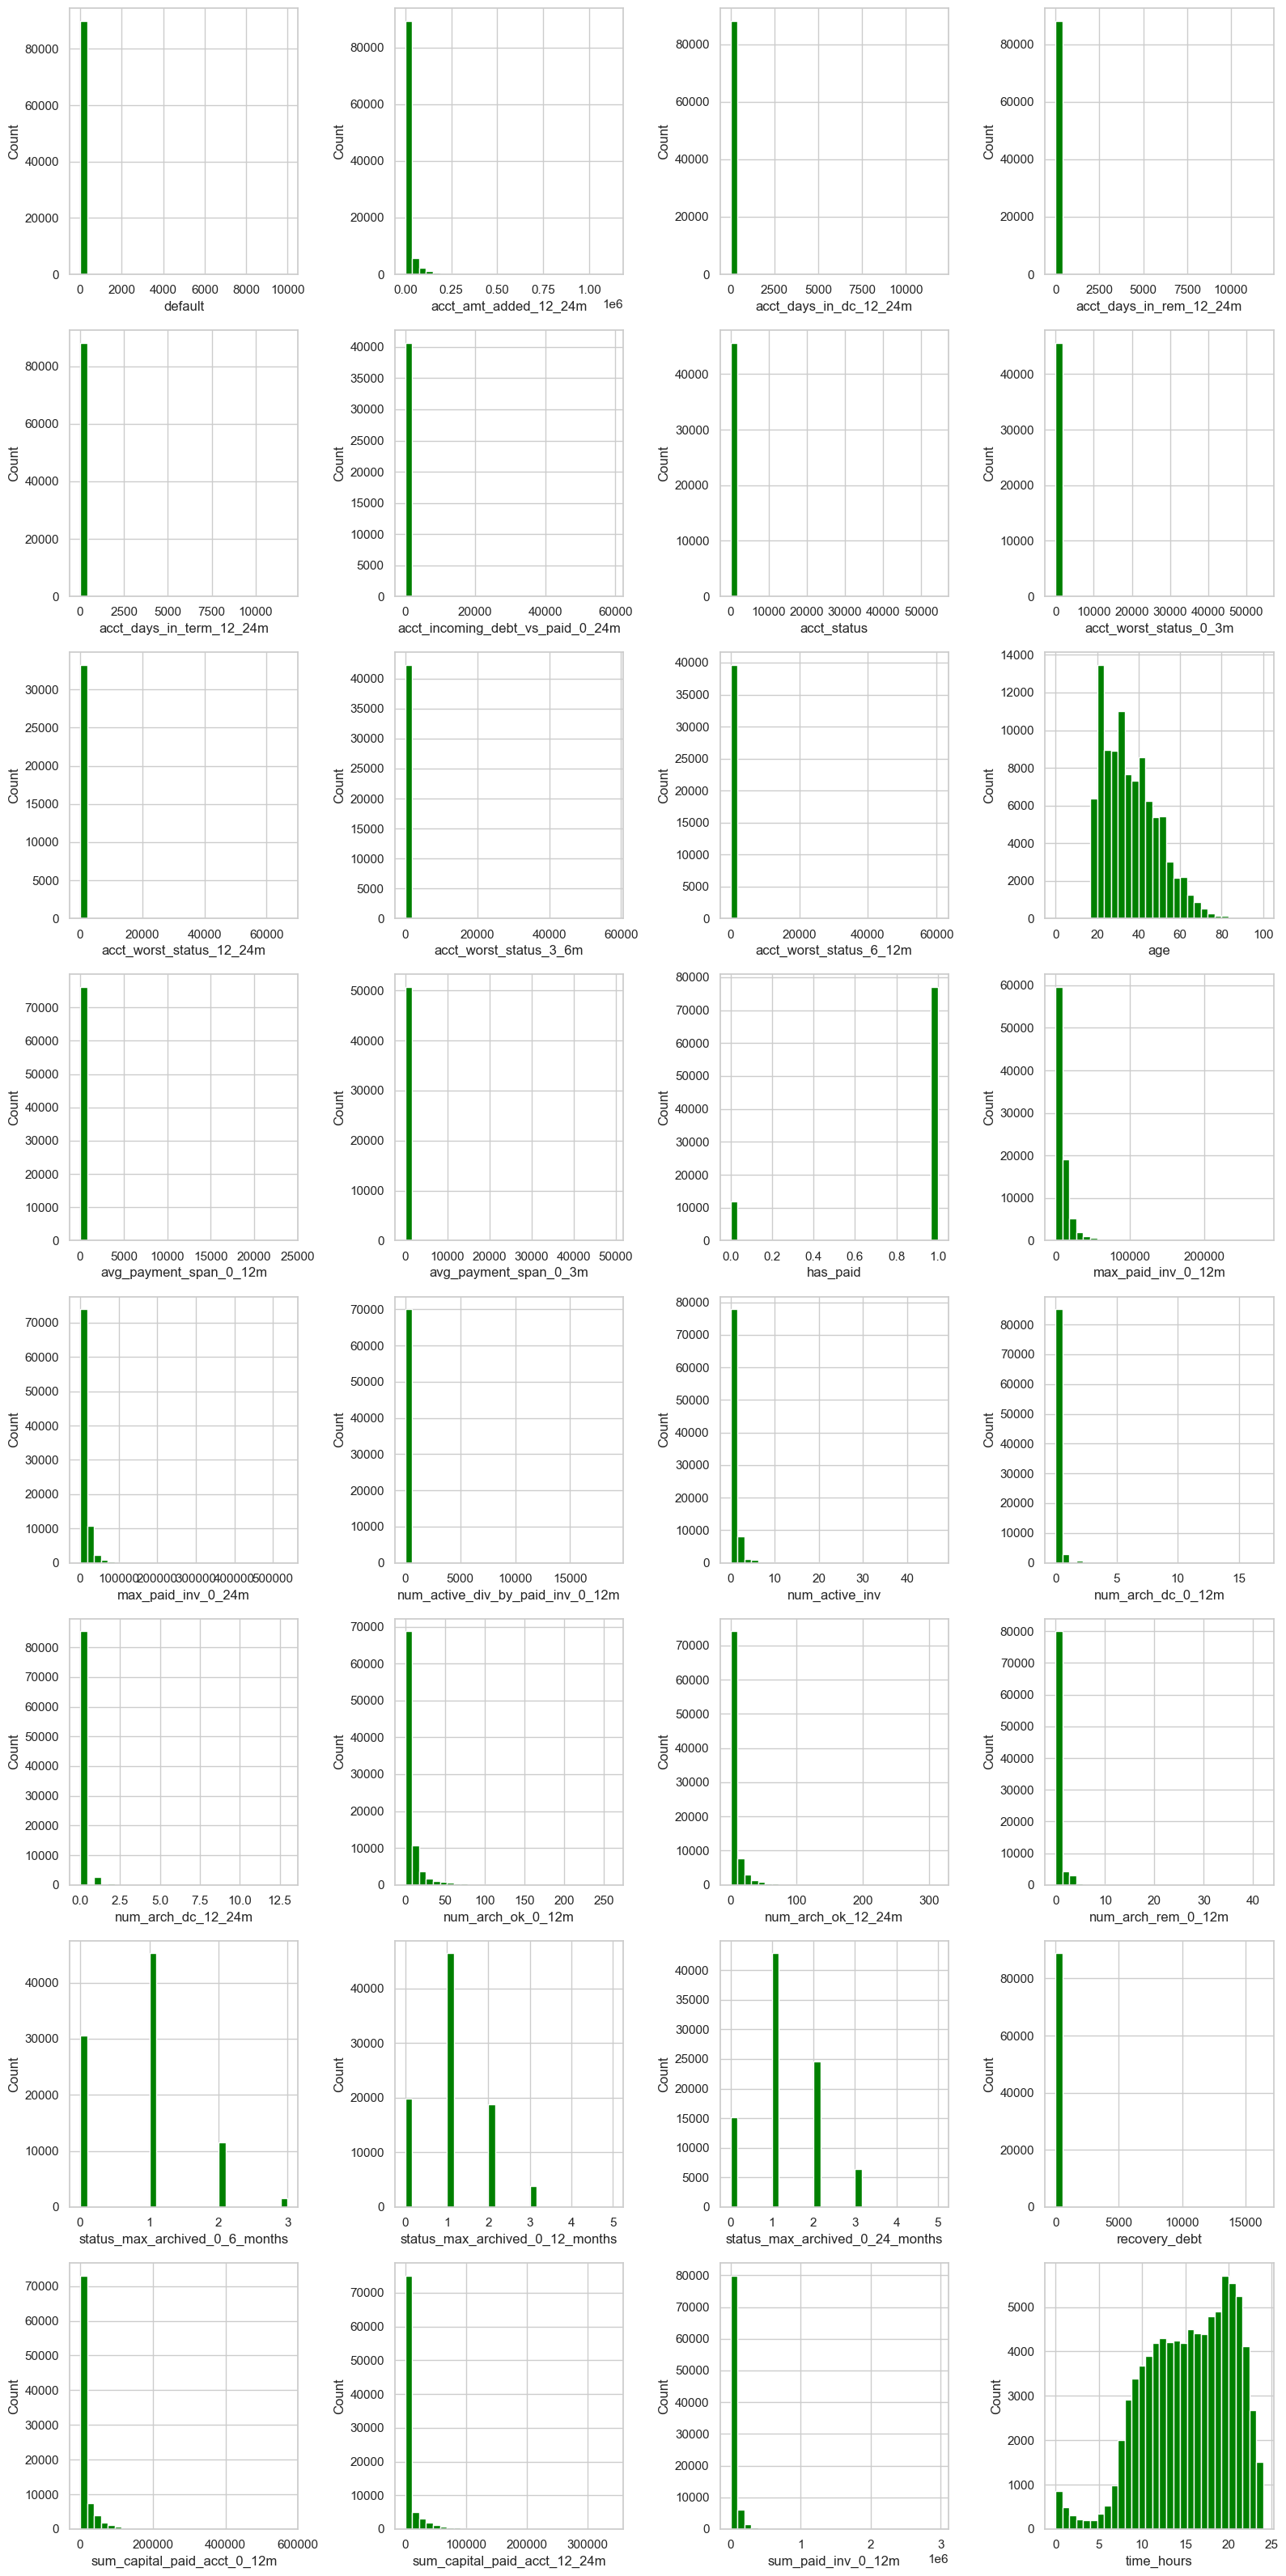

In [14]:
num_cols_per_row = 4
num_rows = (len(df.select_dtypes(include=['float64']).columns) + num_cols_per_row - 1) // num_cols_per_row
plt.figure(figsize=(16, num_rows * 4))
for i, column in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    df[column].plot(kind='hist', bins=30, color='green')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show();

### Univariate Analysis

Countplot for certain columns, to check the distribution of columns, and if there are any junk values present, or any data inconsistencies.

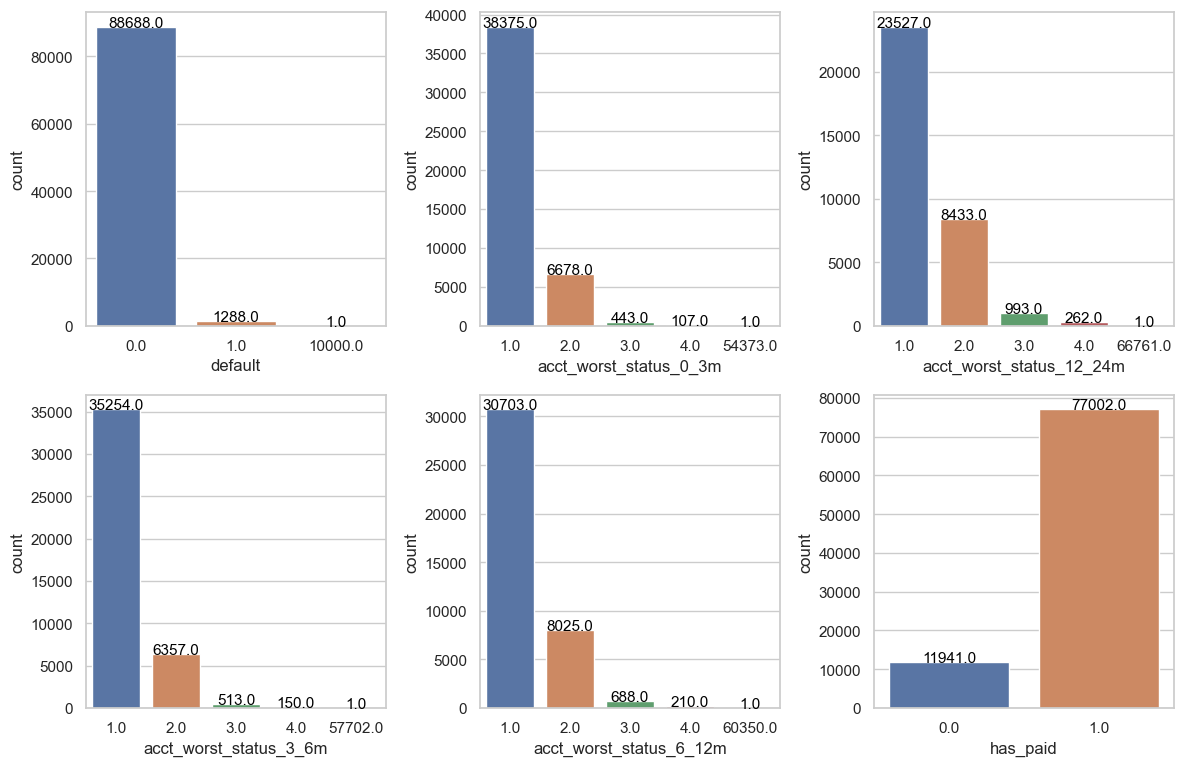

In [15]:
columns_to_count = ["default", "acct_worst_status_0_3m", 
                    "acct_worst_status_12_24m", "acct_worst_status_3_6m", 
                    "acct_worst_status_6_12m", "has_paid"]

plt.figure(figsize=(12, 15))  # Adjust the figure size as needed

for i, column in enumerate(columns_to_count, 1):
    ax = plt.subplot(4, 3, i) # Adjust the subplot parameters based on the number of columns
    sns.countplot(x=column, data=df)
    for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='baseline', fontsize=11, color='black')

plt.tight_layout()
plt.show();

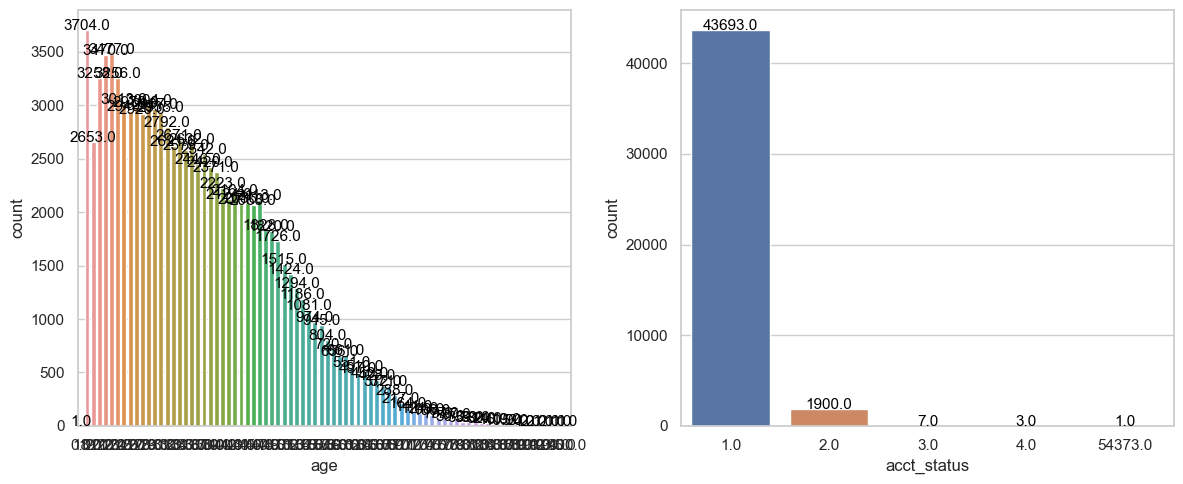

In [16]:
columns_to_count = ["age", "acct_status" ]

plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

for i, column in enumerate(columns_to_count, 1):
    ax = plt.subplot(1, 2, i) # Adjust the subplot parameters based on the number of columns
    sns.countplot(x=column, data=df)
    for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='baseline', fontsize=11, color='black')

plt.tight_layout()
plt.show();

### Multivariate Analysis 

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm',annot = True)
plt.show();

### Checking which columns have the highest percentage of default values

#### Checking the columns which have data "count" unit type. 

In [17]:
df.drop(df[df['default'] == 10000].index, inplace=True)

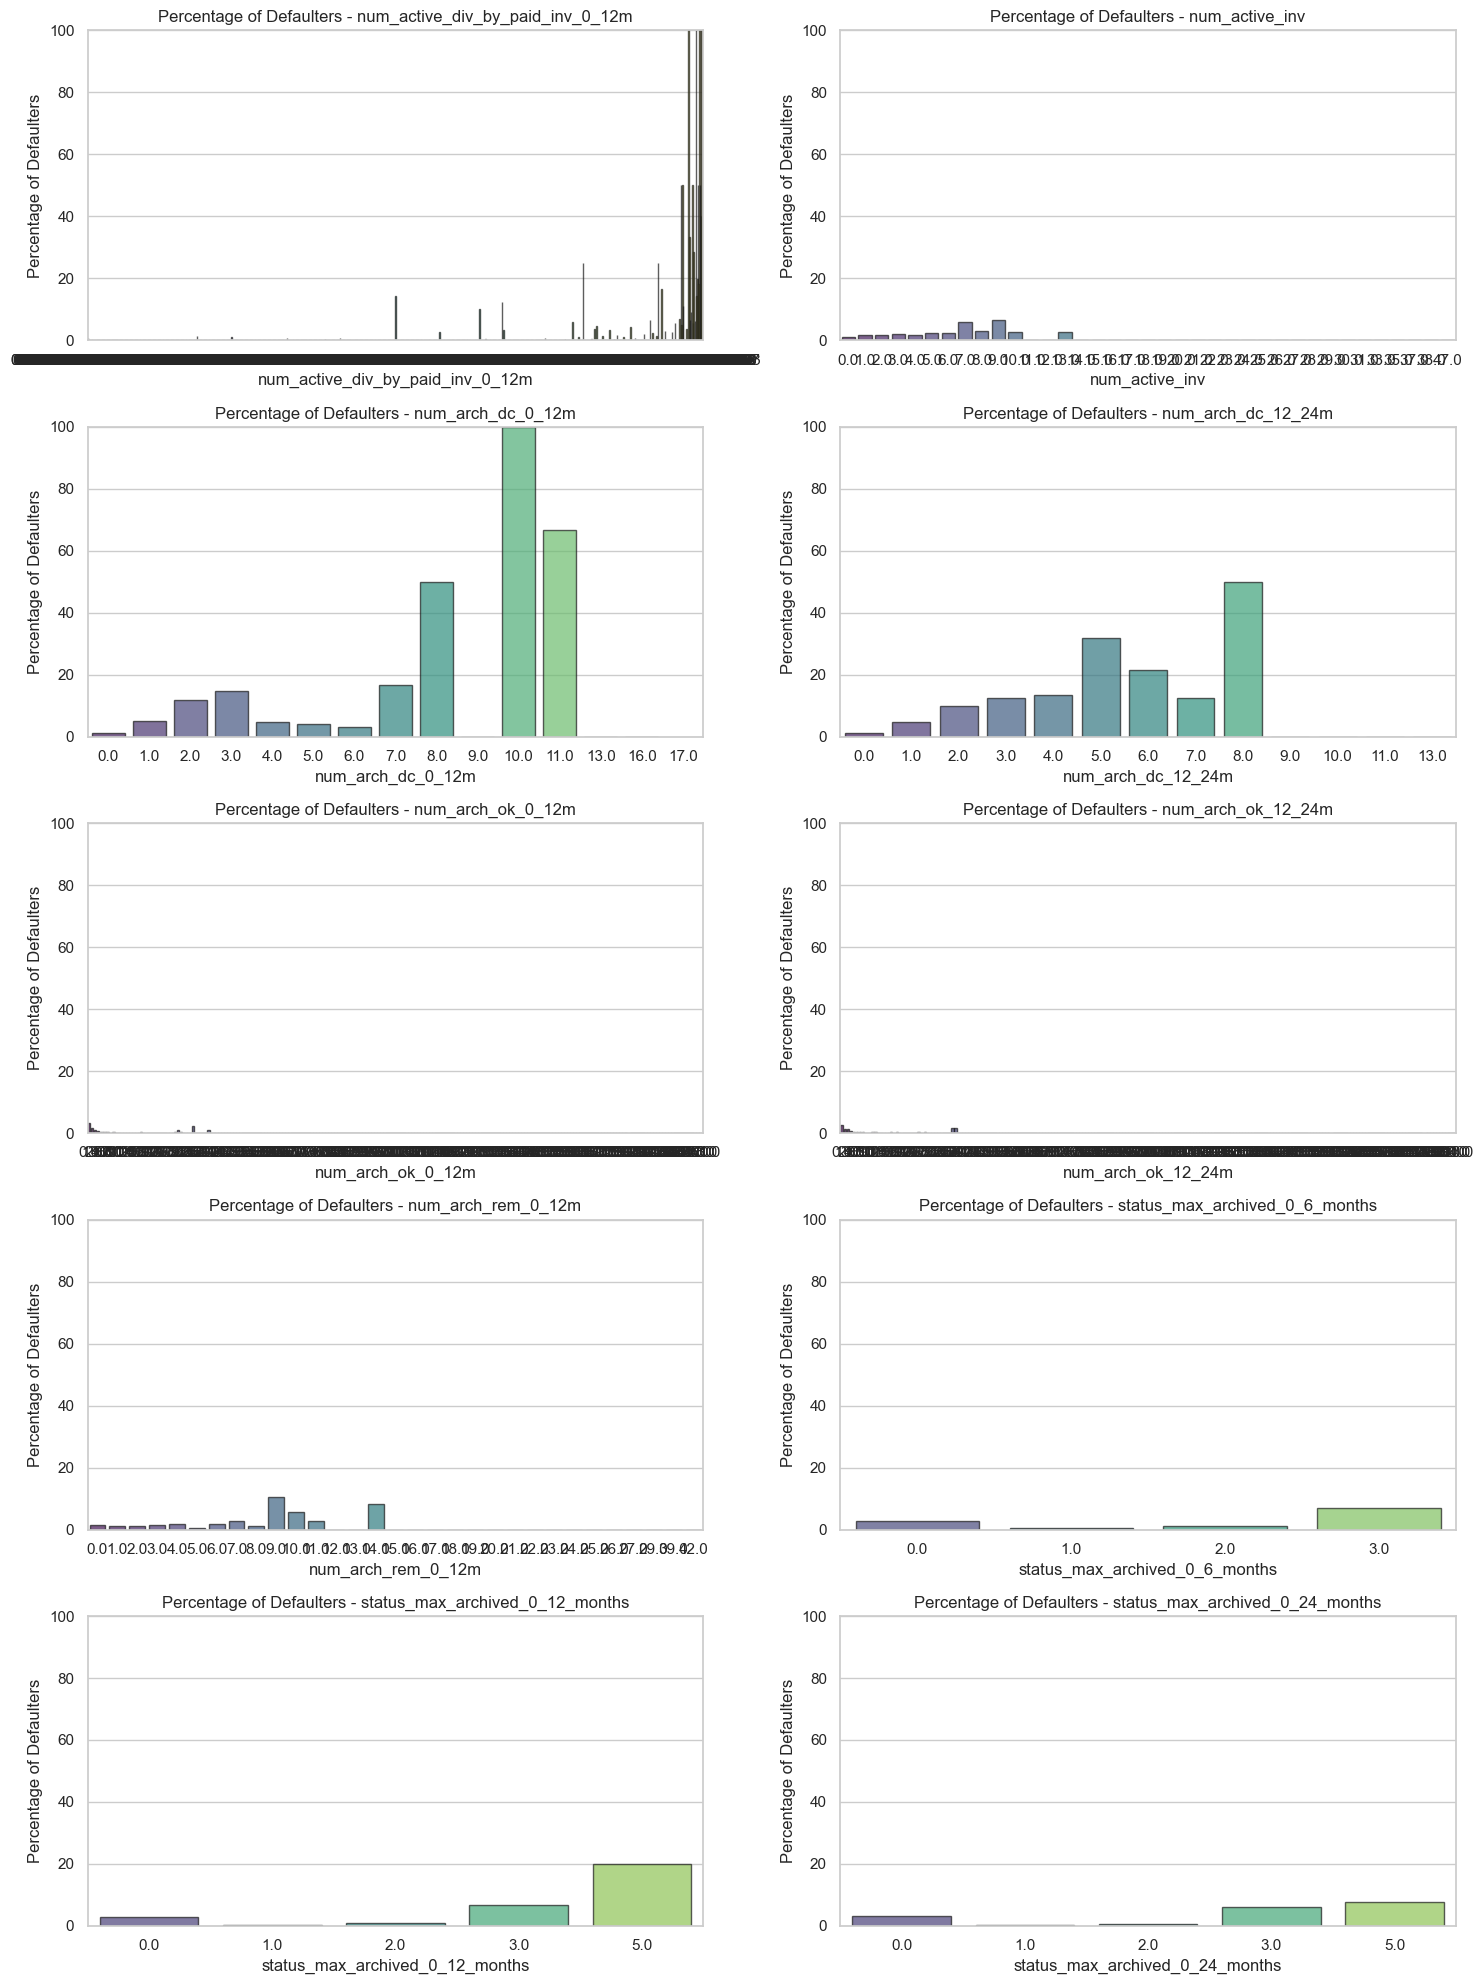

In [18]:
columns_to_visualize = ["num_active_div_by_paid_inv_0_12m", "num_active_inv", "num_arch_dc_0_12m", "num_arch_dc_12_24m", "num_arch_ok_0_12m", "num_arch_ok_12_24m", "num_arch_rem_0_12m", "status_max_archived_0_6_months", "status_max_archived_0_12_months", "status_max_archived_0_24_months"]
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(5, 2, i)
    default_percentage = df.groupby(column)['default'].mean() * 100
    sns.barplot(x=default_percentage.index, y=default_percentage.values, palette='viridis', edgecolor='k', alpha=0.7)
    plt.title(f'Percentage of Defaulters - {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage of Defaulters')
    plt.ylim(0, 100)  # Adjust the y-axis limit to 100 for percentage

plt.tight_layout()
plt.show()

In [19]:
# Drop columns with object datatype and separate the dataframe into X and Y
X = df.select_dtypes(exclude=['object'])  # X contains non-object columns
Y = df.drop(X.columns, axis=1)  # Y contains object columns

In [20]:
Y.columns

Index(['merchant_category', 'merchant_group', 'name_in_email'], dtype='object')

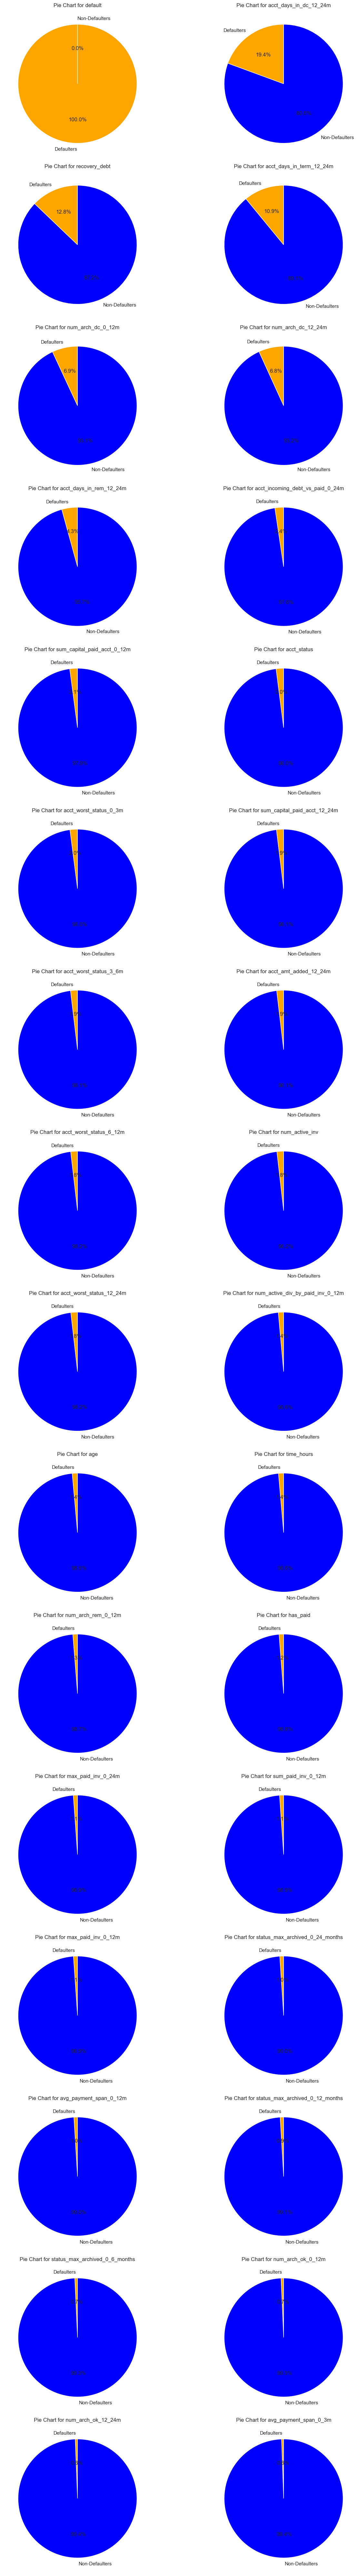

In [21]:
default_percentages = []
column_names = []
for column in X.columns:
    default_counts = X[(X[column] > 0) & (X['default'] == 1)][column].count()
    non_default_counts = X[(X[column] > 0) & (X['default'] == 0)][column].count()
    total_counts = default_counts + non_default_counts
    default_percentage = (default_counts / total_counts) * 100
    default_percentages.append(default_percentage)
    column_names.append(column)
sorted_indices = np.argsort(default_percentages)[::-1]
sorted_column_names = [column_names[i] for i in sorted_indices]
num_plots = len(sorted_column_names)
num_rows = (num_plots + 1) // 2
num_cols = 2
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
for i, column in enumerate(sorted_column_names):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    default_counts = X[(X[column] > 0) & (X['default'] == 1)][column].count()
    non_default_counts = X[(X[column] > 0) & (X['default'] == 0)][column].count()
    total_counts = default_counts + non_default_counts
    default_percentage = (default_counts / total_counts) * 100
    non_default_percentage = (non_default_counts / total_counts) * 100
    ax.pie([default_percentage, non_default_percentage], labels=['Defaulters', 'Non-Defaulters'],
           autopct='%1.1f%%', colors=['orange', 'blue'], startangle=90)
    ax.set_title(f"Pie Chart for {column}")
if num_plots % 2 != 0:
    fig.delaxes(axes.flat[-1])
plt.tight_layout()
plt.show();

In [22]:
default_percentages = []
column_names = []
default_values = []
non_default_values = []
for column in X.columns:
    default_counts = X[(X[column] > 0) & (X['default'] == 1)][column].count()
    non_default_counts = X[(X[column] > 0) & (X['default'] == 0)][column].count()
    total_counts = default_counts + non_default_counts
    default_percentage = (default_counts / total_counts) * 100
    default_percentages.append(default_percentage)
    column_names.append(column)
    default_values.append(default_percentage)
    non_default_values.append(100 - default_percentage)
df_percentages = pd.DataFrame({
    'Column': column_names,
    'Defaulters': default_values,
    'Non-Defaulters': non_default_values
})
df_percentages = df_percentages.sort_values(by='Defaulters', ascending=False)
df_percentages

Column  Defaulters  Non-Defaulters
0                            default      100.00            0.00
2             acct_days_in_dc_12_24m       19.40           80.60
27                     recovery_debt       12.85           87.15
4           acct_days_in_term_12_24m       10.95           89.05
19                 num_arch_dc_0_12m        6.92           93.08
20                num_arch_dc_12_24m        6.81           93.19
3            acct_days_in_rem_12_24m        4.28           95.72
5   acct_incoming_debt_vs_paid_0_24m        2.36           97.64
28       sum_capital_paid_acct_0_12m        2.10           97.90
6                        acct_status        2.04           97.96
7             acct_worst_status_0_3m        2.04           97.96
29      sum_capital_paid_acct_12_24m        1.94           98.06
9             acct_worst_status_3_6m        1.89           98.11
1              acct_amt_added_12_24m        1.87           98.13
10           acct_worst_status_6_12m        1.84           98.16
18                    num_active_inv        1.82           98.18
8           acct_worst_status_12_24m        1.80           98.20
17  num_active_div_by_paid_inv_0_12m        1.43           98.57
11                               age        1.43           98.57
31                        time_hours        1.39           98.61
23                num_arch_rem_0_12m        1.26           98.74
14                          has_paid        1.23           98.77
16                max_paid_inv_0_24m        1.13           98.87
15                max_paid_inv_0_12m        1.10           98.90
30                sum_paid_inv_0_12m        1.10           98.90
26   status_max_archived_0_24_months        1.04           98.96
12            avg_payment_span_0_12m        0.97           99.03
25   status_max_archived_0_12_months        0.93           99.07
24    status_max_archived_0_6_months        0.73           99.27
21                 num_arch_ok_0_12m        0.69           99.31
22                num_arch_ok_12_24m        0.61           99.39
13             avg_payment_span_0_3m        0.55           99.45

#### These are the columns which have high percentage of defaulters. If we take a look at the default column initially, we see a great disparity between defaulters and non-defaulters. therefore, every datapoint is essential to analyse the patterns of defaulters. Hence, dropping the null values of columns is not recommended. Here, "acct_days_in_dc_12_24m", "recovery_debt", "acct_days_in_term_12_24m" have the most datapoints for defaulters. Hence, we will impute these null values using median values of the column. Median remains unaffected by outliers, therefore we will use Median.  KNN imputation is the ideal method, however, it is computationally expensive.

In [31]:
selected_columns = ["avg_payment_span_0_12m", "acct_days_in_dc_12_24m", "acct_days_in_rem_12_24m",
                    "acct_days_in_term_12_24m", "default", "num_arch_ok_0_12m", "sum_paid_inv_0_12m",
                    "sum_capital_paid_acct_12_24m", "sum_capital_paid_acct_0_12m", "recovery_debt",
                    "status_max_archived_0_24_months", "status_max_archived_0_12_months",
                    "status_max_archived_0_6_months", "num_arch_rem_0_12m", "num_arch_ok_12_24m",
                    "num_arch_dc_0_12m", "num_arch_dc_12_24m", "num_active_inv", "max_paid_inv_0_24m",
                    "max_paid_inv_0_12m", "has_paid", "time_hours",
                    "acct_amt_added_12_24m", "age"]
default_percentages = []
column_names = []
default_values = []
non_default_values = []
for column in selected_columns:
    default_counts = X[(X[column] > 0) & (X['default'] == 1)][column].count()
    non_default_counts = X[(X[column] > 0) & (X['default'] == 0)][column].count()
    total_counts = default_counts + non_default_counts
    default_percentage = (default_counts / total_counts) * 100
    default_percentages.append(default_percentage)
    column_names.append(column)
    default_values.append(default_percentage)
    non_default_values.append(100 - default_percentage)
df_percentages = pd.DataFrame({
    'Column': column_names,
    'Defaulters': default_values,
    'Non-Defaulters': non_default_values
})
df_percentages = df_percentages.sort_values(by='Defaulters', ascending=False)
df_percentages

Column  Defaulters  Non-Defaulters
4                           default      100.00            0.00
1            acct_days_in_dc_12_24m       19.40           80.60
9                     recovery_debt       12.85           87.15
3          acct_days_in_term_12_24m       10.95           89.05
15                num_arch_dc_0_12m        6.92           93.08
16               num_arch_dc_12_24m        6.81           93.19
2           acct_days_in_rem_12_24m        4.28           95.72
8       sum_capital_paid_acct_0_12m        2.10           97.90
7      sum_capital_paid_acct_12_24m        1.94           98.06
22            acct_amt_added_12_24m        1.87           98.13
17                   num_active_inv        1.82           98.18
23                              age        1.43           98.57
21                       time_hours        1.39           98.61
13               num_arch_rem_0_12m        1.26           98.74
20                         has_paid        1.23           98.77
18               max_paid_inv_0_24m        1.13           98.87
19               max_paid_inv_0_12m        1.10           98.90
6                sum_paid_inv_0_12m        1.10           98.90
10  status_max_archived_0_24_months        1.04           98.96
0            avg_payment_span_0_12m        0.97           99.03
11  status_max_archived_0_12_months        0.93           99.07
12   status_max_archived_0_6_months        0.73           99.27
5                 num_arch_ok_0_12m        0.69           99.31
14               num_arch_ok_12_24m        0.61           99.39

In [57]:
df= pd.concat([X,Y],axis =1)

Total Anomalies observed: 
1. Duplicate records
2. Dropping irrelevant columns
3. Null value Treatment
4. dropping junk values present in relevant columns
5. Outlier Treatment

### Drop Duplicates 

In [23]:
df.drop_duplicates(inplace= True)
df.duplicated().sum().sum()

0

### Dropping irrelevant columns 

In [24]:
df.drop(['name_in_email'],axis='columns', inplace=True)
df.head(2)

default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0     0.00                   0.00                    0.00   
1     0.00                   0.00                    0.00   

   acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
0                     0.00                      0.00   
1                     0.00                      0.00   

   acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
0                              0.00         1.00                    1.00   
1                               NaN         1.00                    1.00   

   acct_worst_status_12_24m  acct_worst_status_3_6m  acct_worst_status_6_12m  \
0                       NaN                    1.00                      NaN   
1                      1.00                    1.00                     1.00   

    age  avg_payment_span_0_12m  avg_payment_span_0_3m    merchant_category  \
0 20.00                   12.69                   8.33  Dietary supplements   
1 50.00                   25.83                  25.00    Books & Magazines   

    merchant_group  has_paid  max_paid_inv_0_12m  max_paid_inv_0_24m  \
0  Health & Beauty      1.00            31638.00            31638.00   
1    Entertainment      1.00            13749.00            13749.00   

   num_active_div_by_paid_inv_0_12m  num_active_inv  num_arch_dc_0_12m  \
0                              0.15            2.00               0.00   
1                              0.00            0.00               0.00   

   num_arch_dc_12_24m  num_arch_ok_0_12m  num_arch_ok_12_24m  \
0                0.00              13.00               14.00   
1                0.00               9.00               19.00   

   num_arch_rem_0_12m  status_max_archived_0_6_months  \
0                0.00                            1.00   
1                3.00                            1.00   

   status_max_archived_0_12_months  status_max_archived_0_24_months  \
0                             1.00                             1.00   
1                             2.00                             2.00   

   recovery_debt  sum_capital_paid_acct_0_12m  sum_capital_paid_acct_12_24m  \
0           0.00                         0.00                          0.00   
1           0.00                         0.00                          0.00   

   sum_paid_inv_0_12m  time_hours  
0           178839.00        9.65  
1            49014.00       13.18

### Null Value treatment after inspecting columns

In [25]:
null_percentage = (df.isnull().sum() / len(df)) * 100
sorted_null_percentage = null_percentage.sort_values(ascending=False).round(2)
print("Percentage of null values in each column (sorted in descending order):")
print(sorted_null_percentage)

Percentage of null values in each column (sorted in descending order):
acct_worst_status_12_24m           65.82
acct_worst_status_6_12m            59.24
acct_incoming_debt_vs_paid_0_24m   58.17
acct_worst_status_3_6m             56.52
acct_status                        53.10
acct_worst_status_0_3m             53.10
avg_payment_span_0_3m              47.89
num_active_div_by_paid_inv_0_12m   27.91
avg_payment_span_0_12m             21.74
acct_days_in_dc_12_24m             11.94
acct_days_in_rem_12_24m            11.94
acct_days_in_term_12_24m           11.94
default                            10.13
num_arch_rem_0_12m                  8.47
status_max_archived_0_6_months      8.47
status_max_archived_0_24_months     8.47
status_max_archived_0_12_months     8.47
sum_paid_inv_0_12m                  8.47
recovery_debt                       8.47
sum_capital_paid_acct_0_12m         8.47
sum_capital_paid_acct_12_24m        8.47
num_arch_ok_0_12m                   8.47
num_arch_ok_12_24m         

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


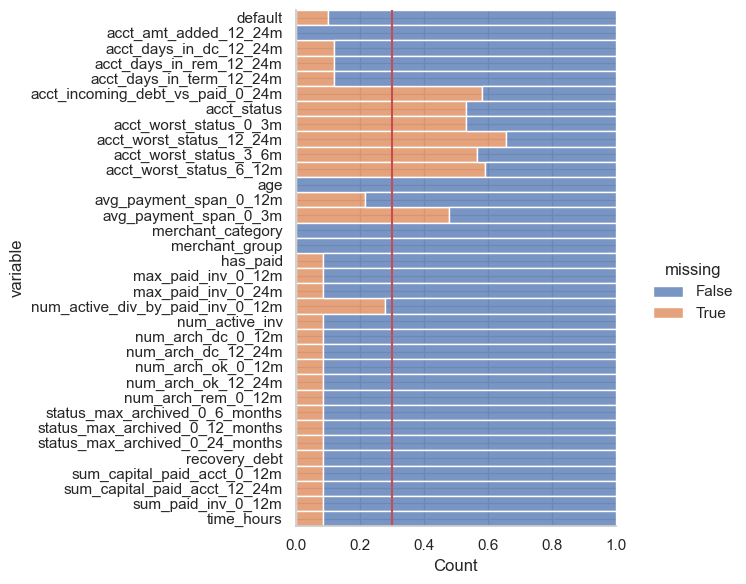

In [26]:
sns.displot(
    data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=6,
    aspect=1.1
)
plt.axvline(0.3, color='r');

#### As our dataset is huge, we will remove columns which have percentage of null values approx 30% or more.

DataFrame after dropping columns with more than 30% null values:


C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


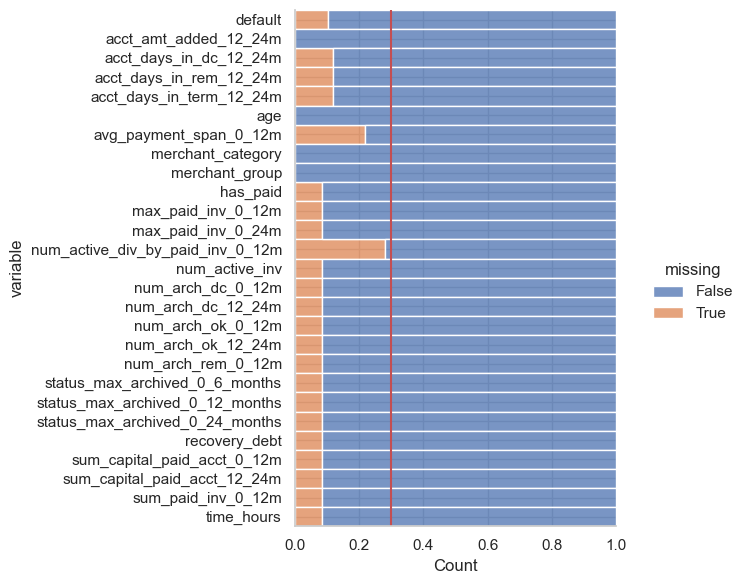

In [27]:
# Calculate the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100
# Drop columns where null values are greater than 30%
columns_to_drop = null_percentage[null_percentage > 30].index
df_2 = df.drop(columns=columns_to_drop)

# Print the cleaned DataFrame
print("DataFrame after dropping columns with more than 30% null values:")
sns.displot(
    data=df_2.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=6,
    aspect=1.1
)
#### specifying a threshold value
plt.axvline(0.3, color='r');

In [28]:
df_2.drop(["num_active_div_by_paid_inv_0_12m"],axis='columns', inplace=True)
null_percentage = (df_2.isnull().sum() / len(df_2)) * 100
sorted_null_percentage = null_percentage.sort_values(ascending=False)
print("Percentage of null values in each column (sorted in descending order):")
print(sorted_null_percentage)

Percentage of null values in each column (sorted in descending order):
avg_payment_span_0_12m            21.74
acct_days_in_dc_12_24m            11.94
acct_days_in_rem_12_24m           11.94
acct_days_in_term_12_24m          11.94
default                           10.13
num_arch_ok_0_12m                  8.47
sum_paid_inv_0_12m                 8.47
sum_capital_paid_acct_12_24m       8.47
sum_capital_paid_acct_0_12m        8.47
recovery_debt                      8.47
status_max_archived_0_24_months    8.47
status_max_archived_0_12_months    8.47
status_max_archived_0_6_months     8.47
num_arch_rem_0_12m                 8.47
num_arch_ok_12_24m                 8.47
num_arch_dc_0_12m                  8.47
num_arch_dc_12_24m                 8.47
num_active_inv                     8.47
max_paid_inv_0_24m                 8.47
max_paid_inv_0_12m                 8.47
has_paid                           8.47
time_hours                         8.47
merchant_group                     0.01
acct_amt_

### Null Value Treatment (Simple Imputer using Median)

In [53]:
from sklearn.impute import SimpleImputer
columns_to_impute = [
    'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'acct_days_in_rem_12_24m',
    'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
    'acct_amt_added_12_24m', 'num_active_inv', 'age', 'time_hours',
    'num_arch_rem_0_12m', 'has_paid', 'max_paid_inv_0_24m',
    'max_paid_inv_0_12m', 'sum_paid_inv_0_12m', 'status_max_archived_0_24_months',
    'avg_payment_span_0_12m', 'status_max_archived_0_12_months',
    'status_max_archived_0_6_months', 'num_arch_ok_0_12m', 'num_arch_ok_12_24m','acct_days_in_dc_12_24m','recovery_debt', 
    'acct_days_in_term_12_24m'
]

imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the specified columns
df_2[columns_to_impute] = imputer.fit_transform(df_2[columns_to_impute])
null_counts = df_2[columns_to_impute].isnull().sum()
null_counts

num_arch_dc_0_12m                  0
num_arch_dc_12_24m                 0
acct_days_in_rem_12_24m            0
sum_capital_paid_acct_0_12m        0
sum_capital_paid_acct_12_24m       0
acct_amt_added_12_24m              0
num_active_inv                     0
age                                0
time_hours                         0
num_arch_rem_0_12m                 0
has_paid                           0
max_paid_inv_0_24m                 0
max_paid_inv_0_12m                 0
sum_paid_inv_0_12m                 0
status_max_archived_0_24_months    0
avg_payment_span_0_12m             0
status_max_archived_0_12_months    0
status_max_archived_0_6_months     0
num_arch_ok_0_12m                  0
num_arch_ok_12_24m                 0
acct_days_in_dc_12_24m             0
recovery_debt                      0
acct_days_in_term_12_24m           0
dtype: int64

In [54]:
null_percentage = (df_2.isnull().sum() / len(df_2)) * 100
sorted_null_percentage = null_percentage.sort_values(ascending=False).round(2)
print("Percentage of null values in each column (sorted in descending order):")
print(sorted_null_percentage)

Percentage of null values in each column (sorted in descending order):
default                           10.13
merchant_group                     0.01
merchant_category                  0.00
num_arch_dc_12_24m                 0.00
sum_paid_inv_0_12m                 0.00
sum_capital_paid_acct_12_24m       0.00
sum_capital_paid_acct_0_12m        0.00
recovery_debt                      0.00
status_max_archived_0_24_months    0.00
status_max_archived_0_12_months    0.00
status_max_archived_0_6_months     0.00
num_arch_rem_0_12m                 0.00
num_arch_ok_12_24m                 0.00
num_arch_ok_0_12m                  0.00
num_arch_dc_0_12m                  0.00
acct_amt_added_12_24m              0.00
num_active_inv                     0.00
max_paid_inv_0_24m                 0.00
max_paid_inv_0_12m                 0.00
has_paid                           0.00
avg_payment_span_0_12m             0.00
age                                0.00
acct_days_in_term_12_24m           0.00
acct_days

In [55]:
df_2.dropna(inplace=True)
df_2.isnull().sum().sum()

0

In [56]:
df_2.shape

(87316, 26)

### Outlier Treatment

In [58]:
# Drop columns with object datatype and separate the dataframe into X and Y
X = df_2.select_dtypes(exclude=['object'])  # X contains non-object columns
Y = df_2.drop(X.columns, axis=1)  # Y contains object columns

In [59]:
df_X = X.drop('default', axis=1)
df_Y = X['default']

In [60]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [61]:
for column in df_X.columns:
    lower_range,upper_range = remove_outlier(df_X[column])
    df_X[column]= np.where(df_X[column]>upper_range, upper_range ,df_X[column])
    df_X[column]= np.where(df_X[column]<lower_range, lower_range ,df_X[column])

In [62]:
X_updated = pd.concat([df_X, df_Y], axis = 1)
df_updated =pd.concat([X_updated, Y], axis = 1)

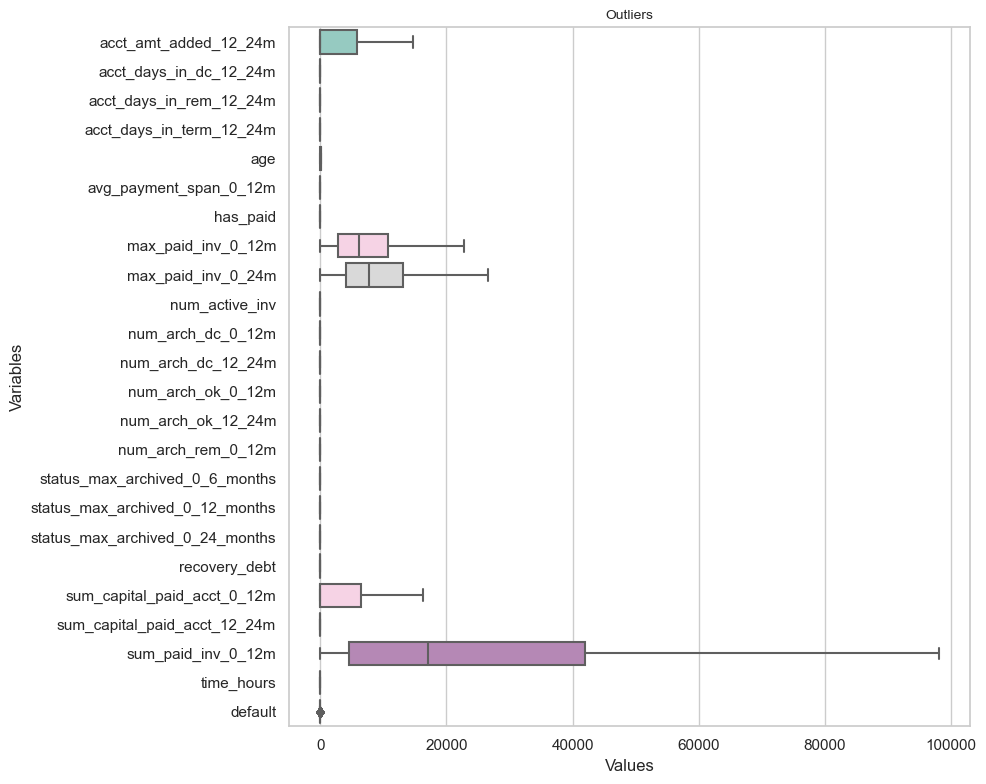

In [63]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_updated, orient='h', palette='Set3')
plt.title('Outliers', fontsize=10)
plt.xlabel('Values')
plt.ylabel('Variables')
plt.tight_layout()
plt.show();

In [68]:
df_updated = pd.DataFrame(df_updated)
df_updated.shape

(87316, 26)

#### Dropping junk values present in columns

Checking Boolean Values and other variables, to check if junk values are present in columns or not. 

In [73]:
df_updated.describe(include= 'all')

acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
count                87316.00                87316.00   
unique                    NaN                     NaN   
top                       NaN                     NaN   
freq                      NaN                     NaN   
mean                  3536.71                    0.00   
std                   5962.48                    0.00   
min                      0.00                    0.00   
25%                      0.00                    0.00   
50%                      0.00                    0.00   
75%                   5879.25                    0.00   
max                  14698.12                    0.00   

        acct_days_in_rem_12_24m  acct_days_in_term_12_24m      age  \
count                  87316.00                  87316.00 87316.00   
unique                      NaN                       NaN      NaN   
top                         NaN                       NaN      NaN   
freq                        NaN                       NaN      NaN   
mean                       0.00                      0.00    35.62   
std                        0.00                      0.00    12.56   
min                        0.00                      0.00    18.00   
25%                        0.00                      0.00    25.00   
50%                        0.00                      0.00    34.00   
75%                        0.00                      0.00    44.00   
max                        0.00                      0.00    72.50   

        avg_payment_span_0_12m  has_paid  max_paid_inv_0_12m  \
count                 87316.00  87316.00            87316.00   
unique                     NaN       NaN                 NaN   
top                        NaN       NaN                 NaN   
freq                       NaN       NaN                 NaN   
mean                     15.95      1.00             7646.15   
std                       6.71      0.00             6644.44   
min                       1.50      1.00                0.00   
25%                      12.00      1.00             2825.75   
50%                      14.92      1.00             6170.00   
75%                      19.00      1.00            10795.00   
max                      29.50      1.00            22748.88   

        max_paid_inv_0_24m  num_active_inv  num_arch_dc_0_12m  \
count             87316.00        87316.00           87316.00   
unique                 NaN             NaN                NaN   
top                    NaN             NaN                NaN   
freq                   NaN             NaN                NaN   
mean               9448.82            0.43               0.00   
std                7702.69            0.76               0.00   
min                   0.00            0.00               0.00   
25%                4080.00            0.00               0.00   
50%                7720.00            0.00               0.00   
75%               13091.25            1.00               0.00   
max               26608.12            2.50               0.00   

        num_arch_dc_12_24m  num_arch_ok_0_12m  num_arch_ok_12_24m  \
count             87316.00           87316.00            87316.00   
unique                 NaN                NaN                 NaN   
top                    NaN                NaN                 NaN   
freq                   NaN                NaN                 NaN   
mean                  0.00               4.71                4.03   
std                   0.00               5.25                4.99   
min                   0.00               0.00                0.00   
25%                   0.00               1.00                0.00   
50%                   0.00               3.00                2.00   
75%                   0.00               7.00                6.00   
max                   0.00              16.00               15.00   

        num_arch_rem_0_12m  status_max_archived_0_6_months  \
count             87316.00               

All the columns seem to have consistent values. We just need to check cateogorical columns, and then one-hot encode them. 

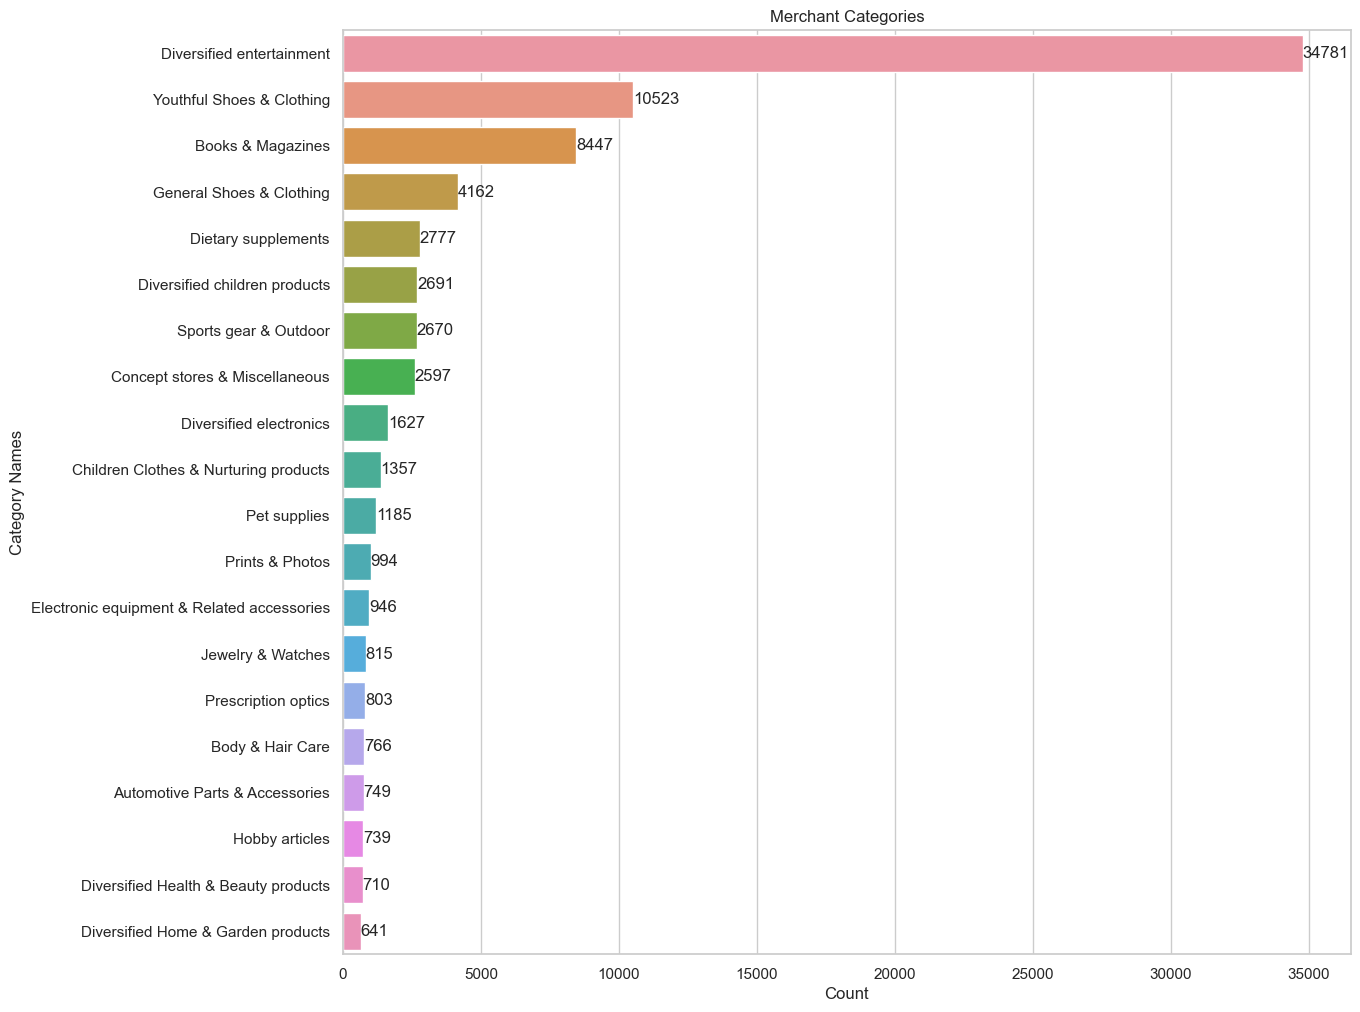

In [74]:
merchant_cat_count= df_updated['merchant_category'].value_counts().head(20).index
plt.figure(figsize=(13, 12))
ax= sns.countplot(data=df_updated, y='merchant_category' , order = merchant_cat_count)
for label in ax.containers:
    ax.bar_label(label)
plt.title('Merchant Categories')
plt.xlabel('Count')
plt.ylabel('Category Names')
plt.show();

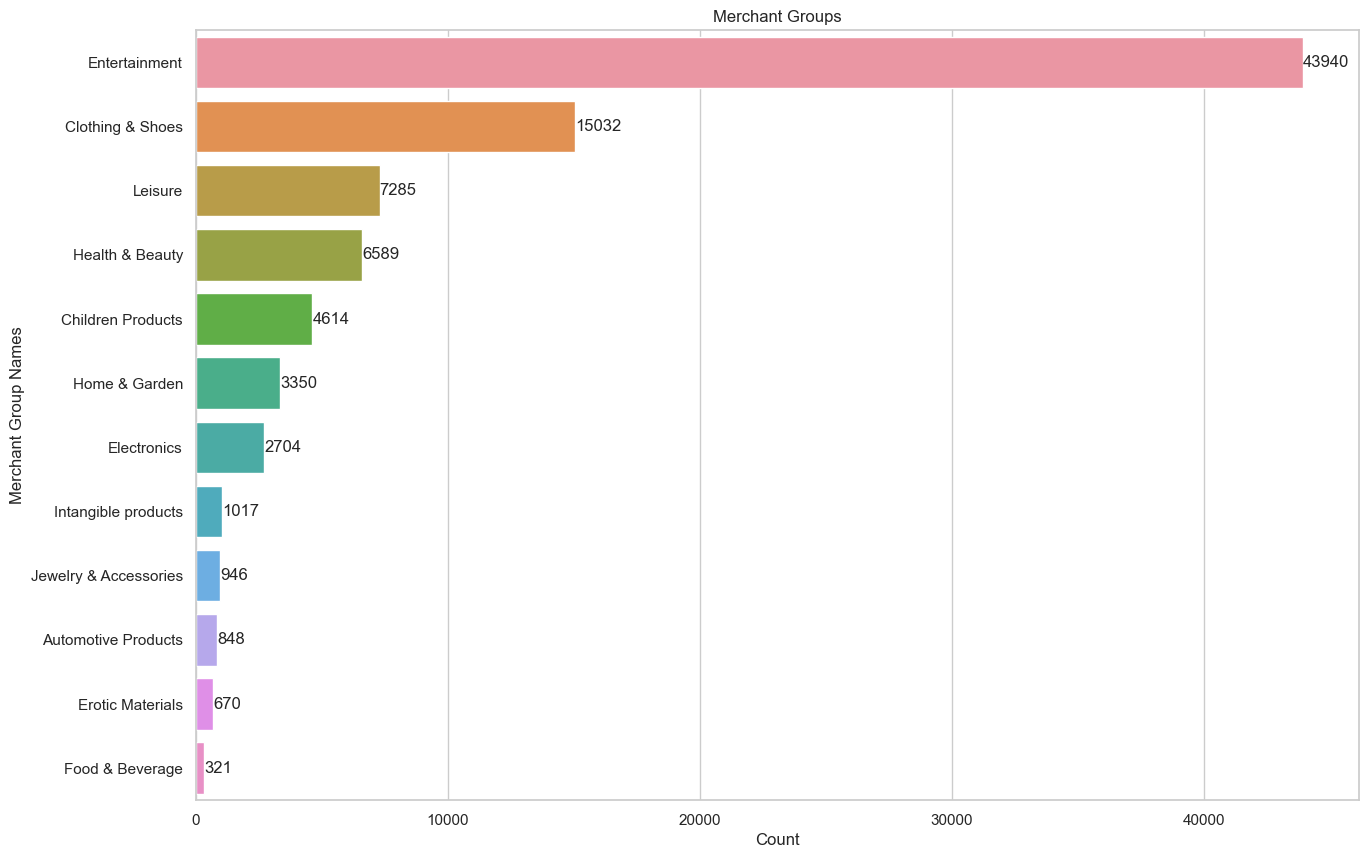

In [75]:
merchant_group_count= df_updated['merchant_group'].value_counts().head(20).index
plt.figure(figsize=(15, 10))
ax= sns.countplot(data=df_updated, y='merchant_group' , order = merchant_group_count)
for label in ax.containers:
    ax.bar_label(label)
plt.title('Merchant Groups')
plt.xlabel('Count')
plt.ylabel('Merchant Group Names')
plt.show();

#### One-hot encoding string data. 

In [81]:
# Drop columns with object datatype and separate the dataframe into X and Y
X = df_updated.select_dtypes(exclude=['object'])  # X contains non-object columns
Y = df_updated.drop(X.columns, axis=1)  # Y contains object columns

In [82]:
Y.shape

(87316, 2)

In [83]:
encoded_Y = pd.get_dummies(Y, drop_first=True)
encoded_Y = encoded_Y.astype(int)
encoded_Y.columns

Index(['merchant_category_Automotive Parts & Accessories',
       'merchant_category_Bags & Wallets',
       'merchant_category_Body & Hair Care',
       'merchant_category_Books & Magazines',
       'merchant_category_Car electronics',
       'merchant_category_Children Clothes & Nurturing products',
       'merchant_category_Children toys',
       'merchant_category_Cleaning & Sanitary',
       'merchant_category_Collectibles',
       'merchant_category_Concept stores & Miscellaneous',
       'merchant_category_Cosmetics',
       'merchant_category_Costumes & Party supplies',
       'merchant_category_Dating services',
       'merchant_category_Decoration & Art',
       'merchant_category_Dietary supplements',
       'merchant_category_Digital services',
       'merchant_category_Diversified Health & Beauty products',
       'merchant_category_Diversified Home & Garden products',
       'merchant_category_Diversified Jewelry & Accessories',
       'merchant_category_Diversified child

In [85]:
concat_df = pd.concat([X, encoded_Y], axis=1)
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87316 entries, 0 to 89975
Data columns (total 90 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   acct_amt_added_12_24m                                                      87316 non-null  float64
 1   acct_days_in_dc_12_24m                                                     87316 non-null  float64
 2   acct_days_in_rem_12_24m                                                    87316 non-null  float64
 3   acct_days_in_term_12_24m                                                   87316 non-null  float64
 4   age                                                                        87316 non-null  float64
 5   avg_payment_span_0_12m                                                     87316 non-null  float64
 6   has_paid                                                   

In [86]:
concat_df.shape

(87316, 90)

### Univariate Analysis

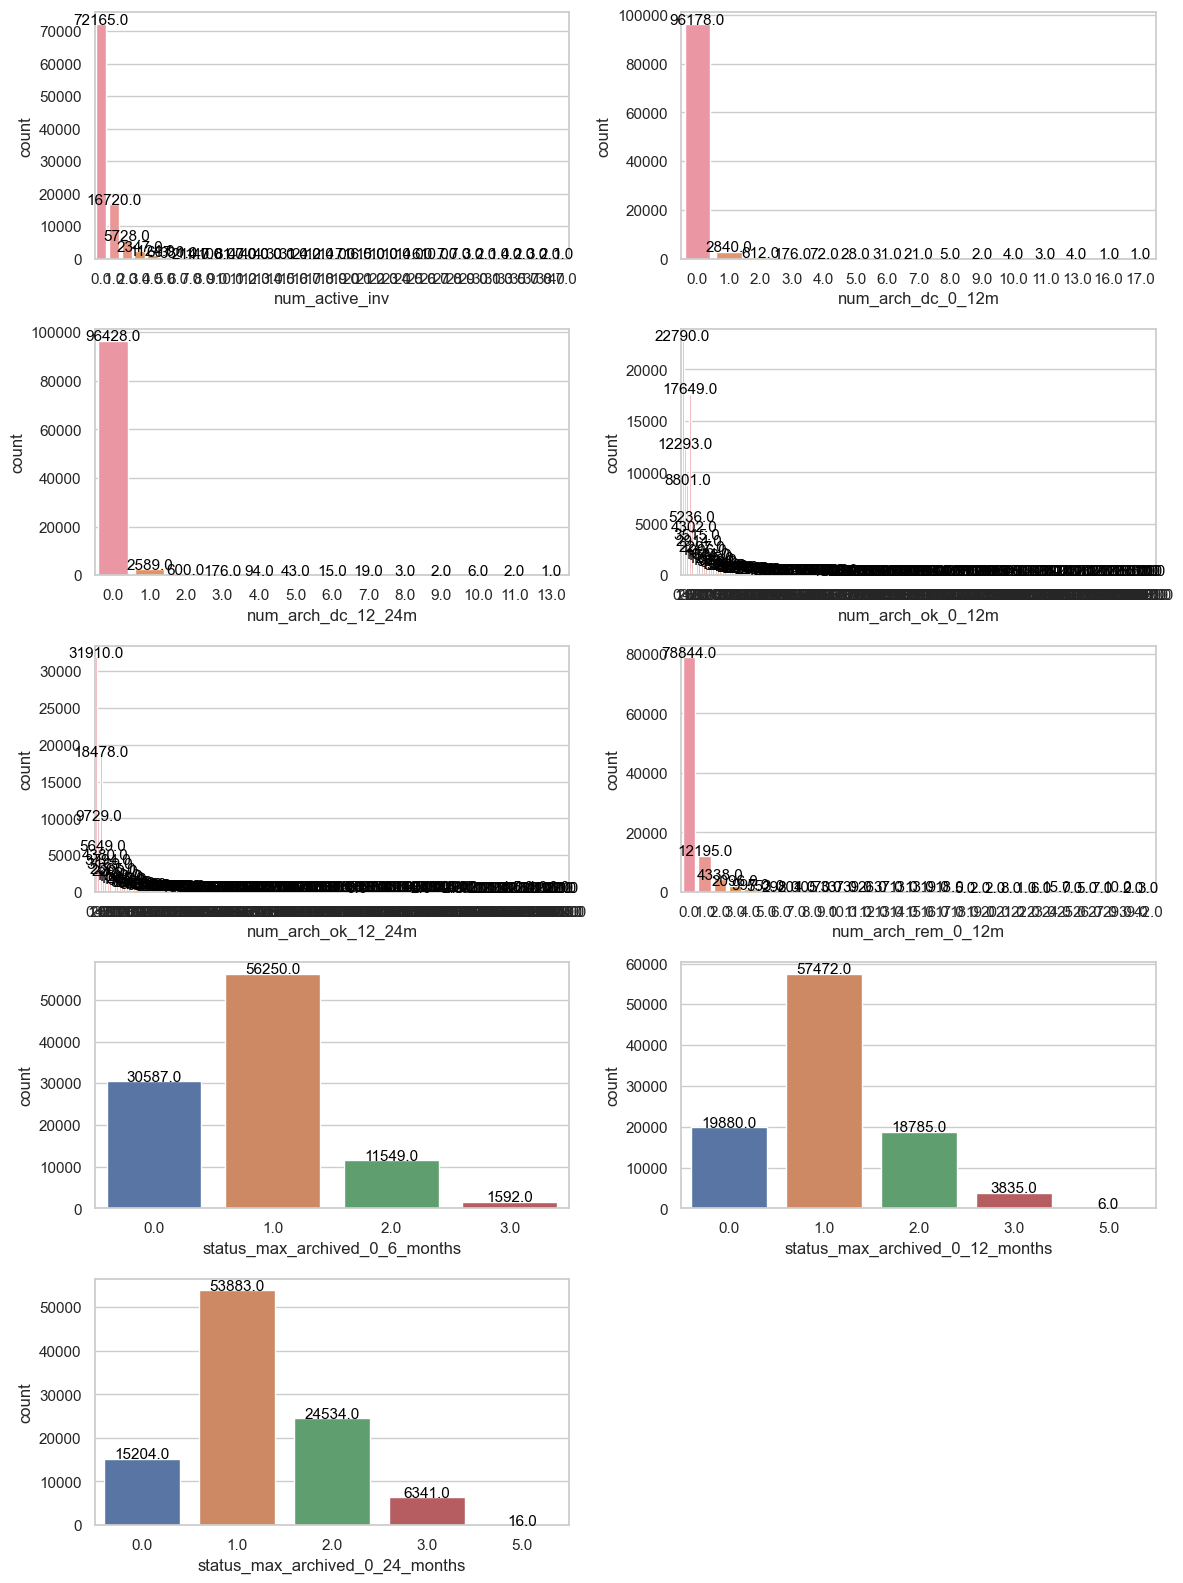

In [94]:
columns_to_count = ["num_active_inv", "num_arch_dc_0_12m","num_arch_dc_12_24m","num_arch_ok_0_12m", 
                    "num_arch_ok_12_24m", "num_arch_rem_0_12m","status_max_archived_0_6_months",
                    "status_max_archived_0_12_months", "status_max_archived_0_24_months"]

plt.figure(figsize=(12, 16))  # Adjust the figure size as needed

for i, column in enumerate(columns_to_count, 1):
    ax = plt.subplot(5, 2, i) # Adjust the subplot parameters based on the number of columns
    sns.countplot(x=column, data=df)
    for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='baseline', fontsize=11, color='black')

plt.tight_layout()
plt.show();

### Bivariate Analysis 

We have Number of days, age, boolean values, count and Amount. Need to find out how to make scatter plots among them to check relationships.

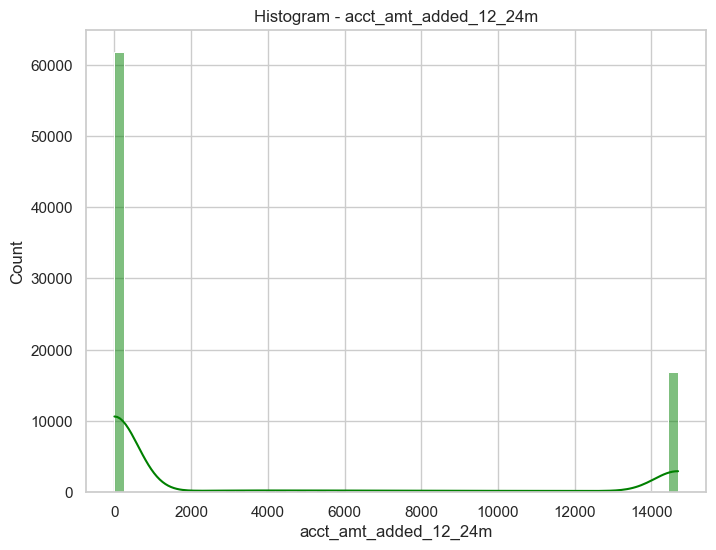

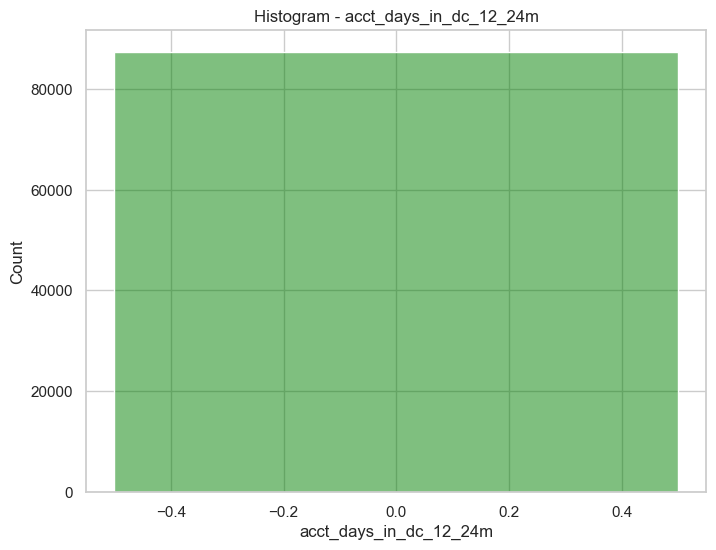

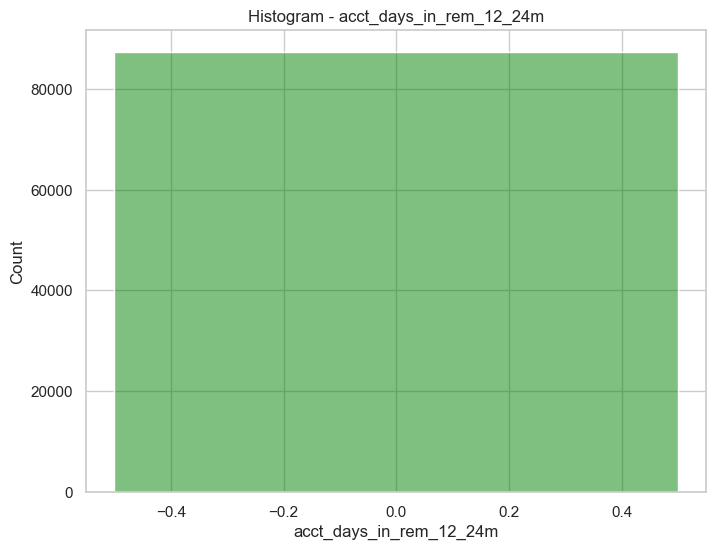

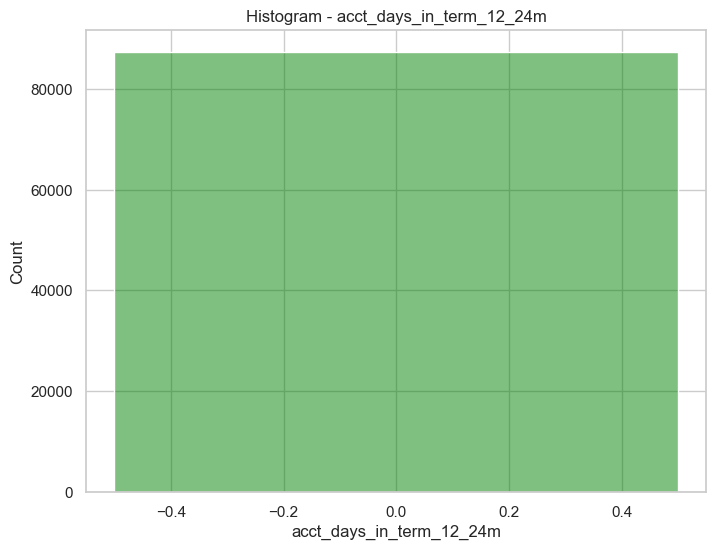

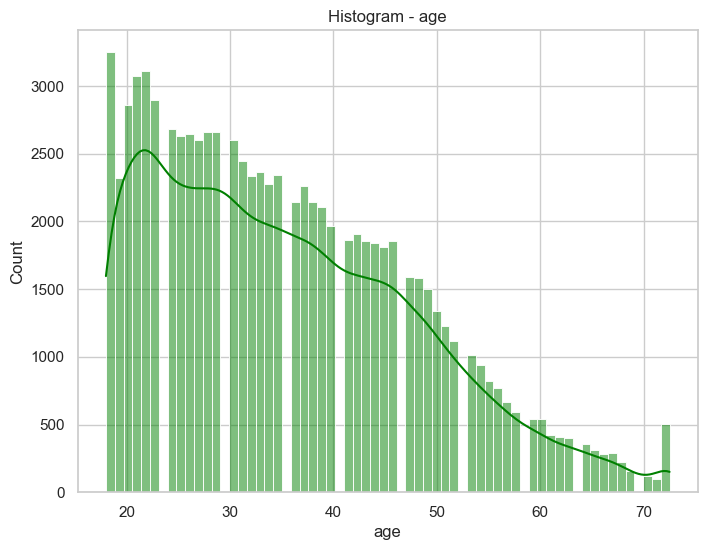

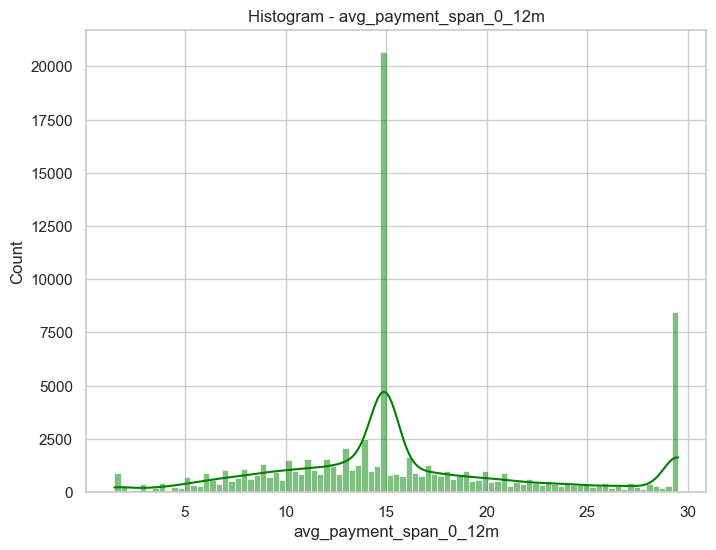

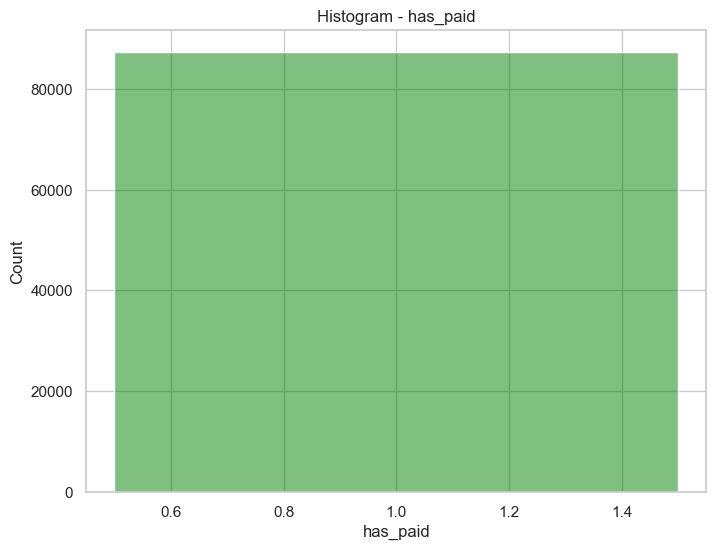

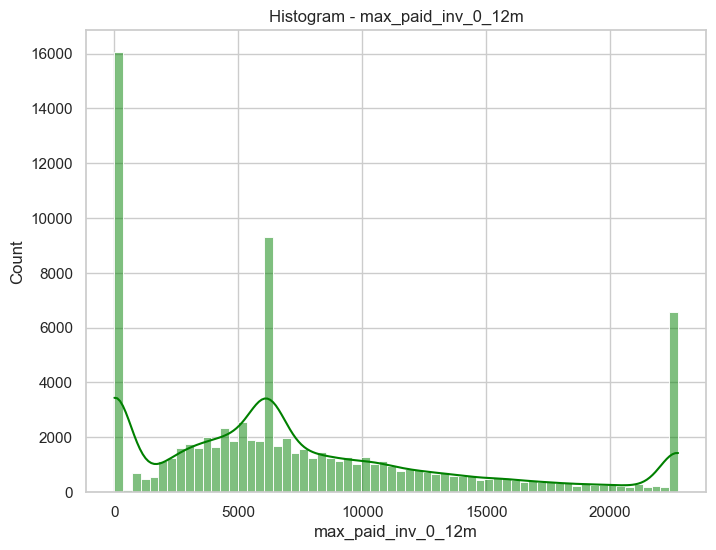

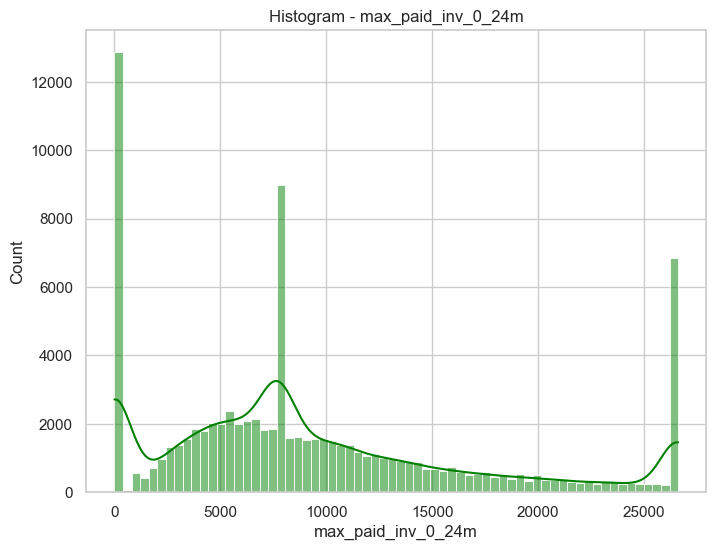

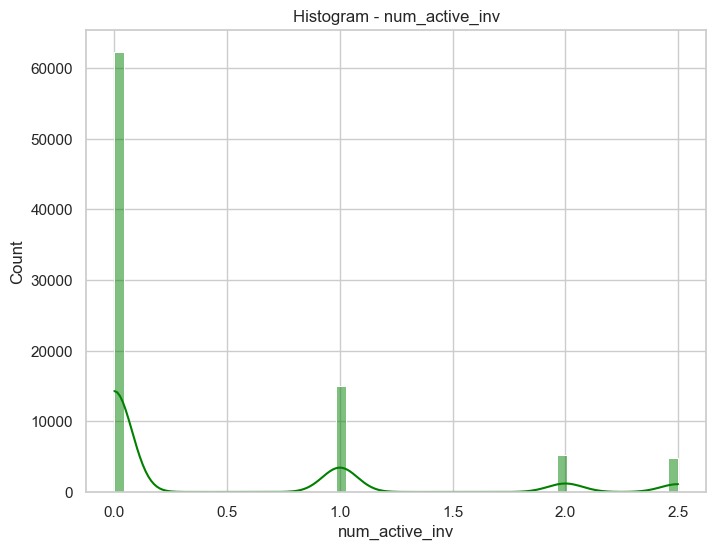

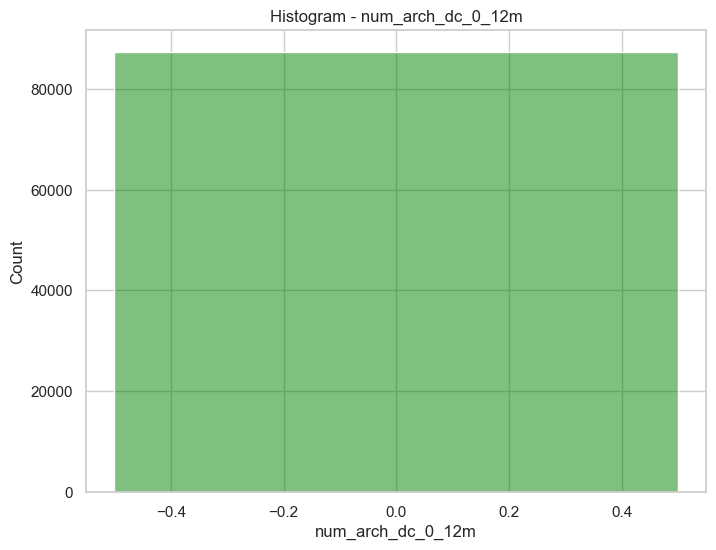

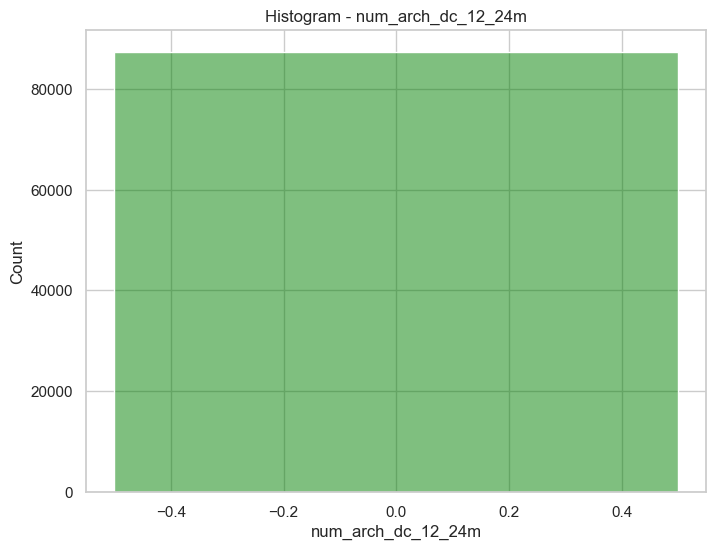

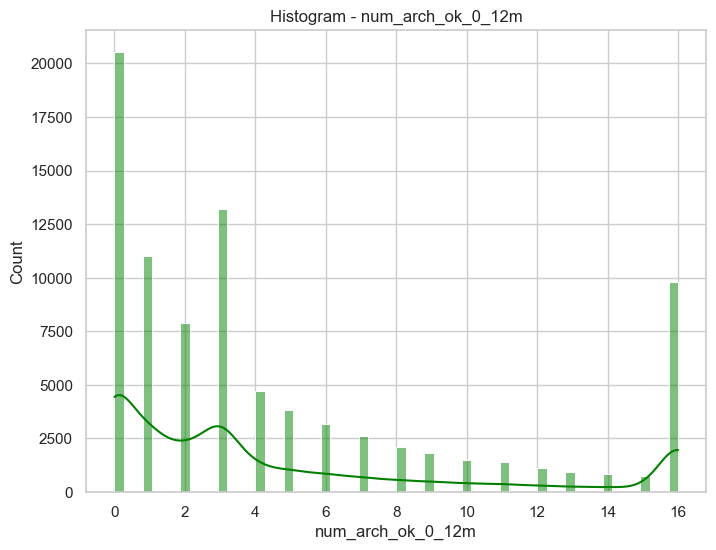

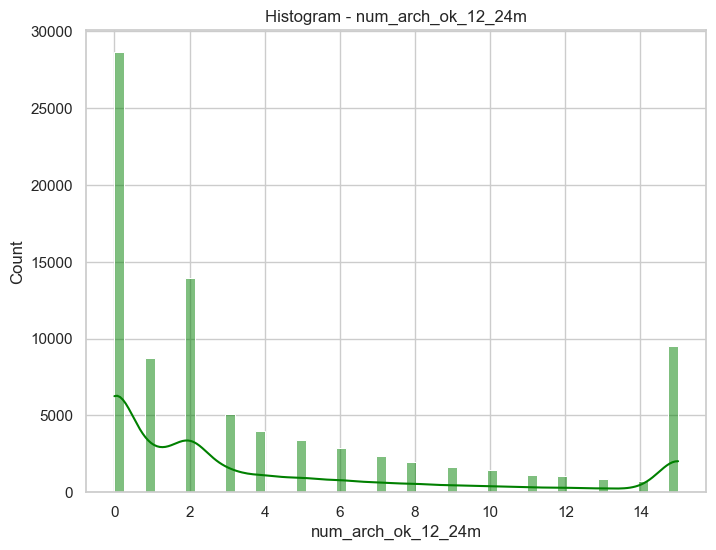

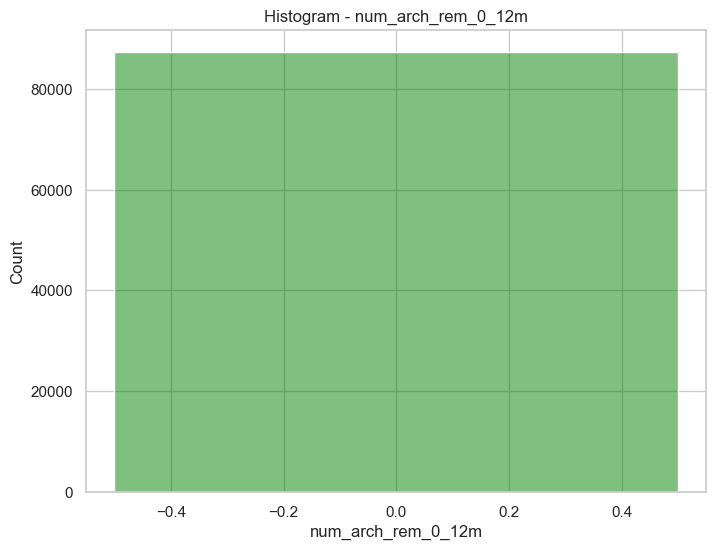

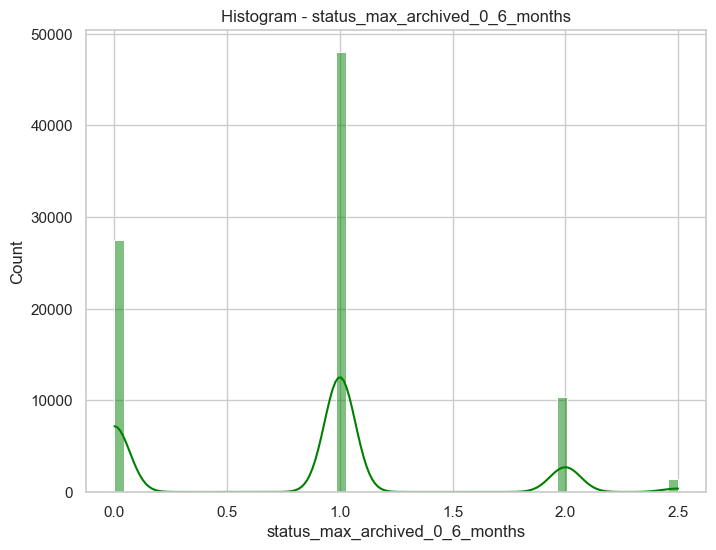

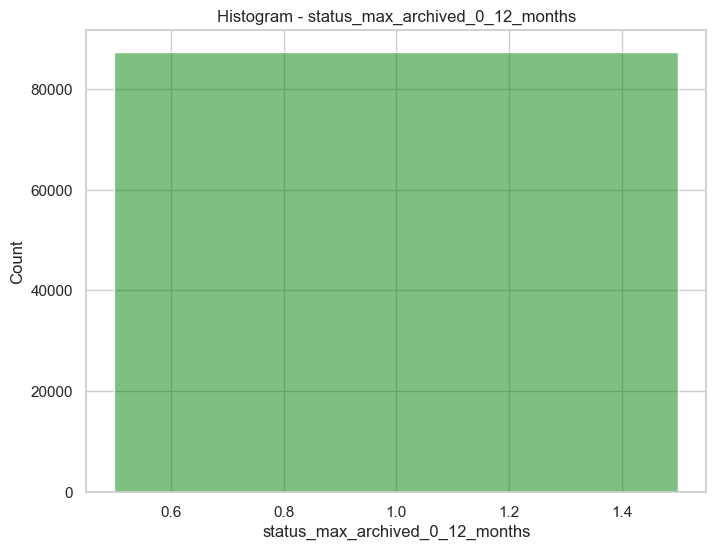

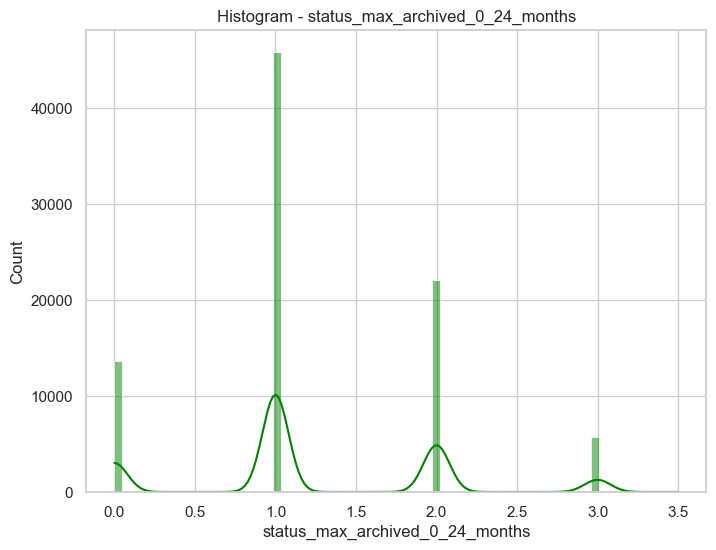

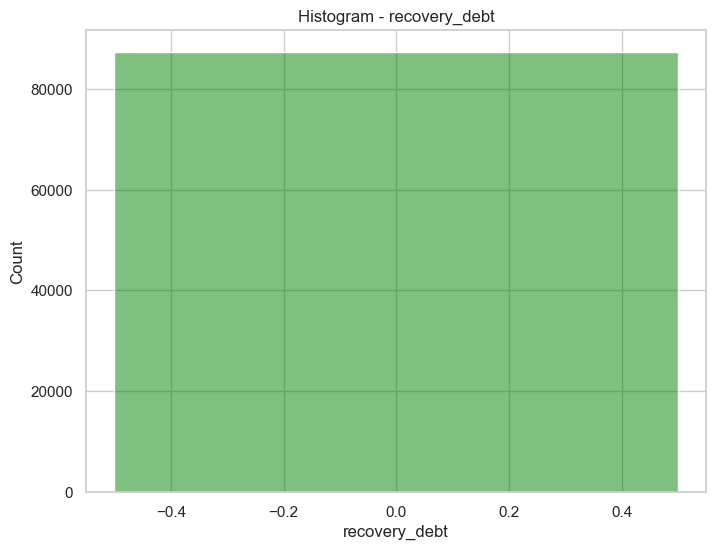

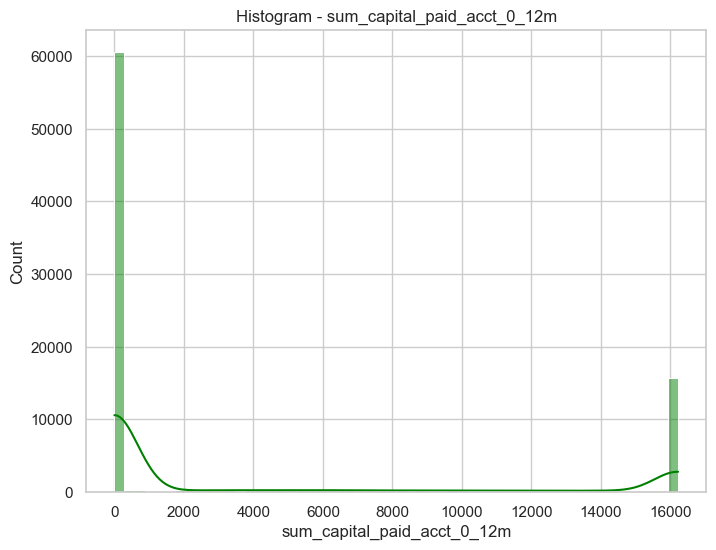

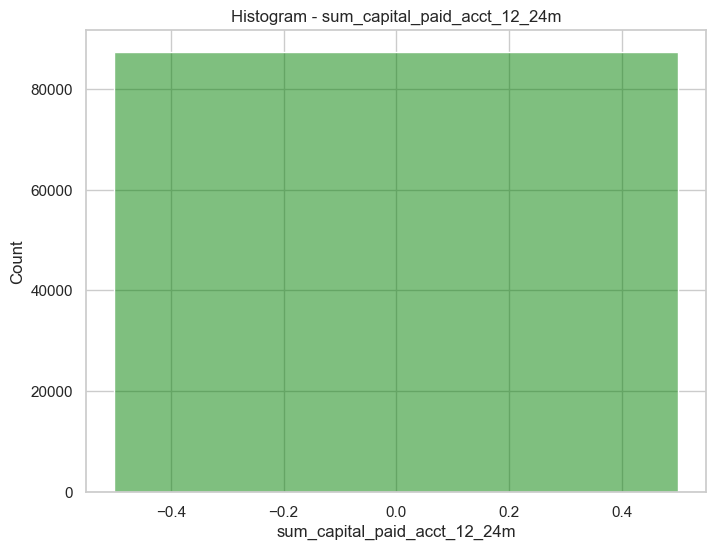

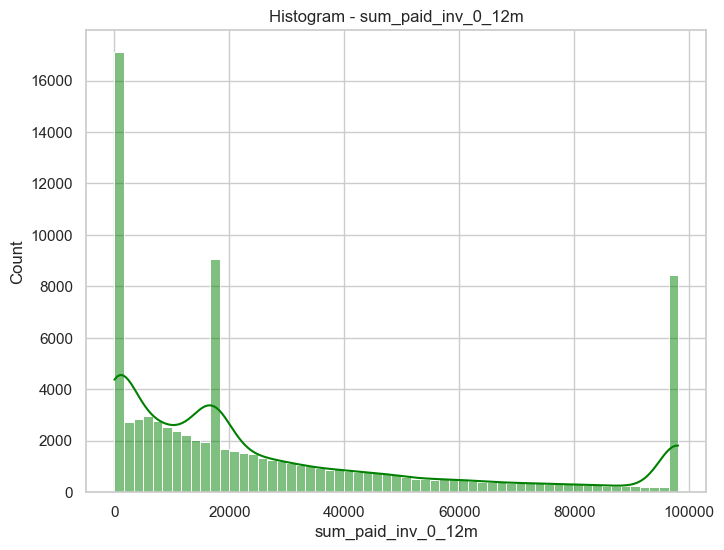

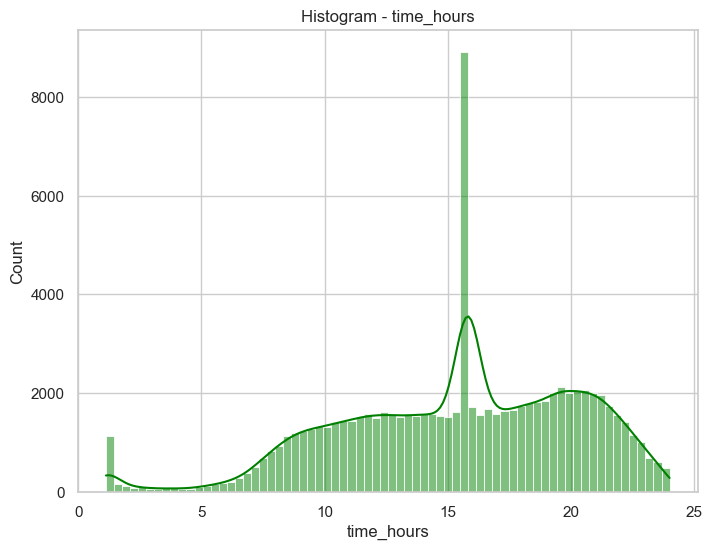

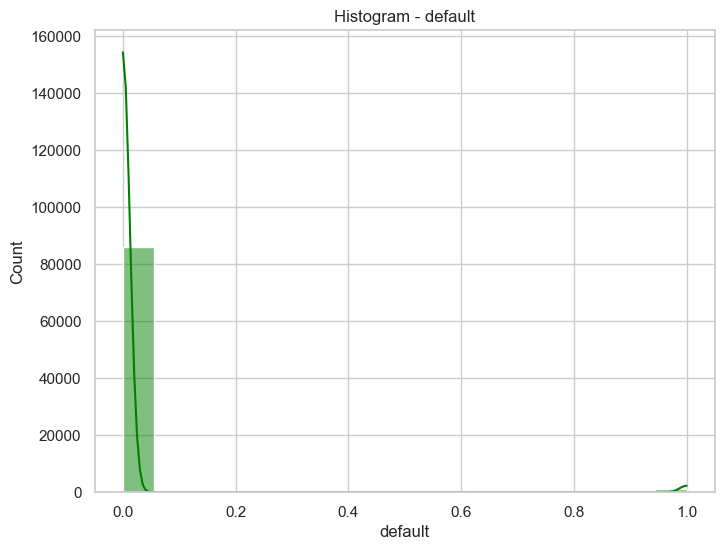

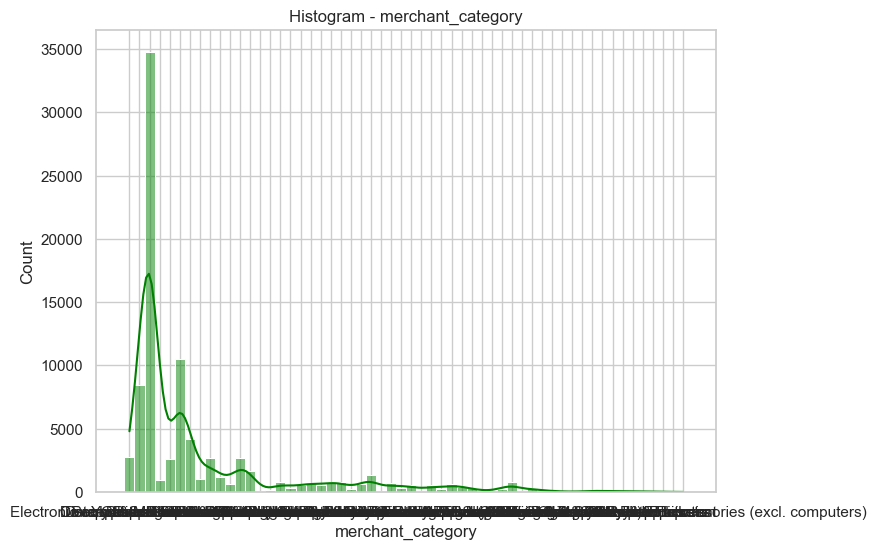

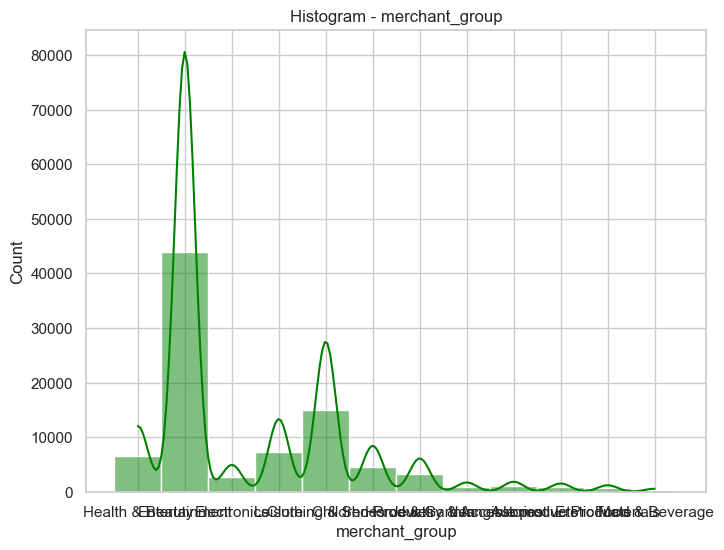

In [105]:
sns.set(style="whitegrid")

# Get the list of feature names from the DataFrame (excluding the 'Cluster' column)
feature_names = df_updated.columns

# Plot individual histograms for each feature
for feature_name in feature_names:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_updated[feature_name], kde=True, color='green')
    plt.title(f'Histogram - {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Count')
    plt.show();

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

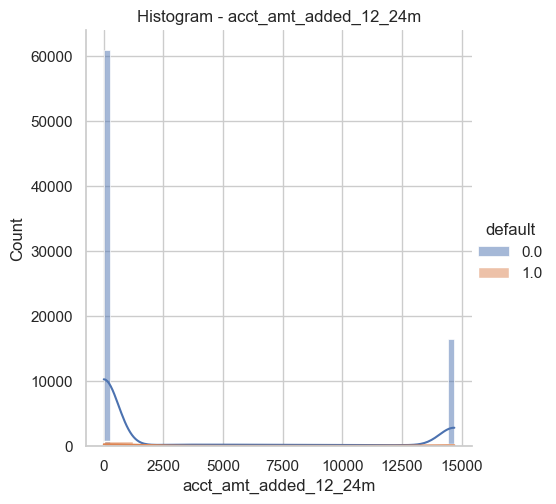

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

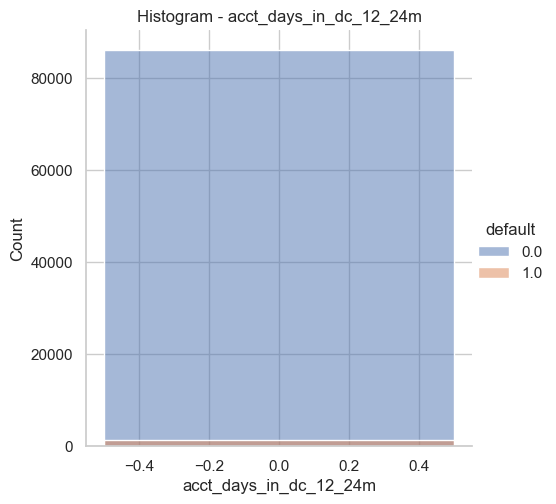

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

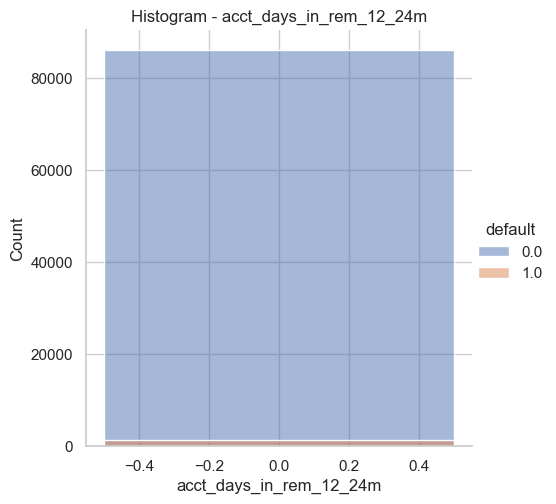

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

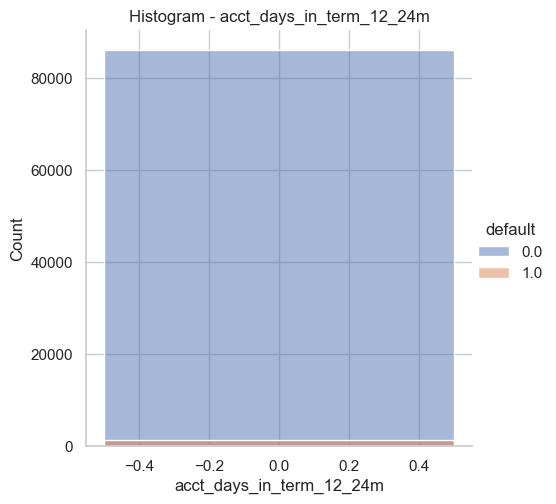

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

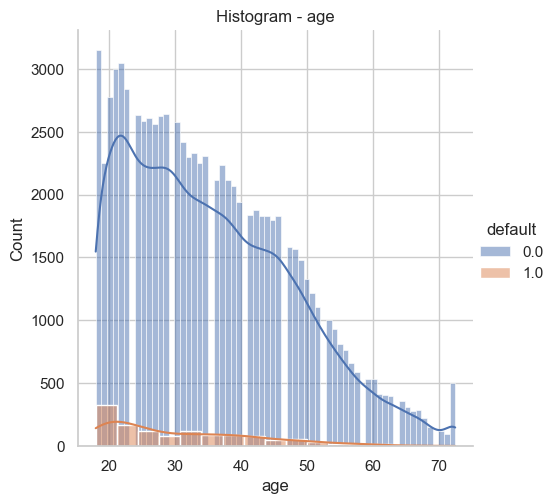

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

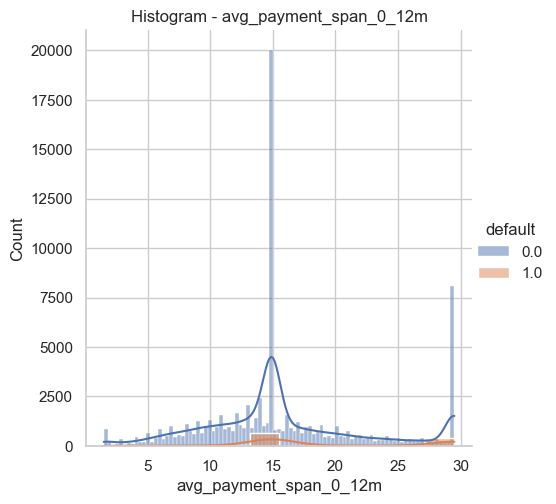

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

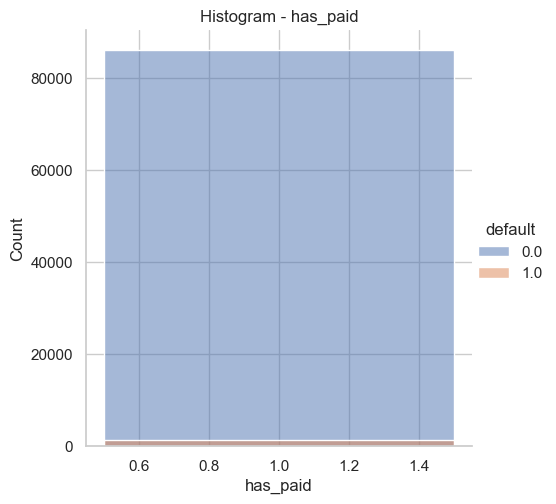

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

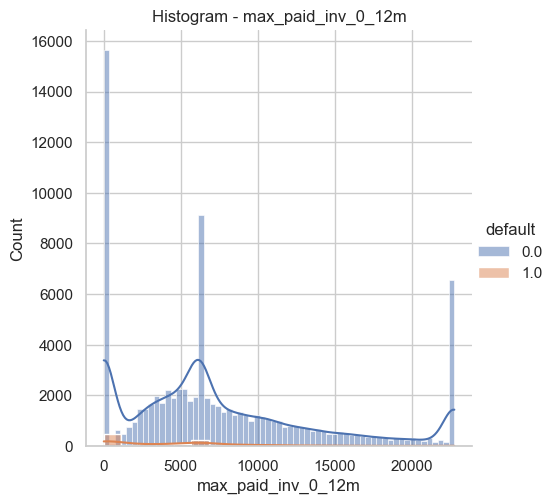

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

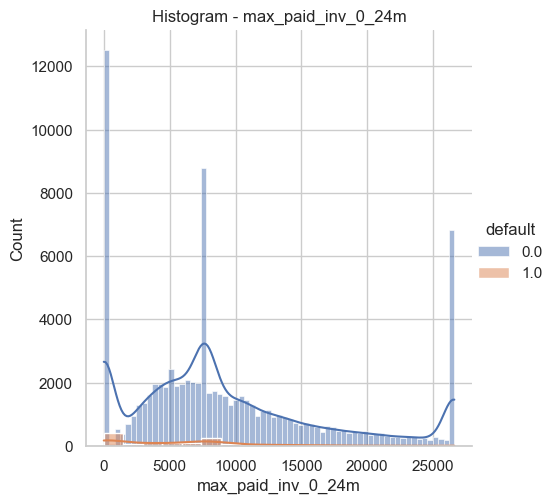

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

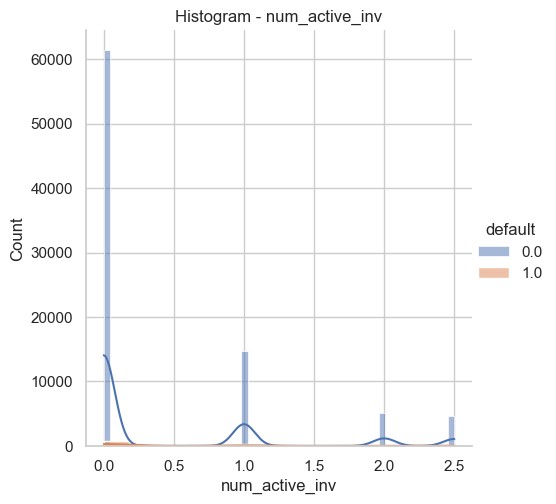

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

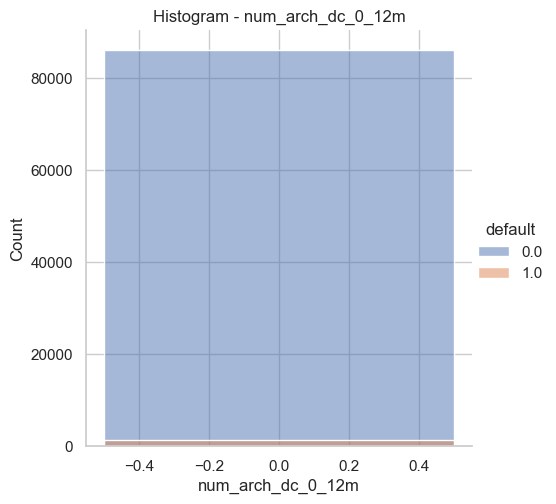

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

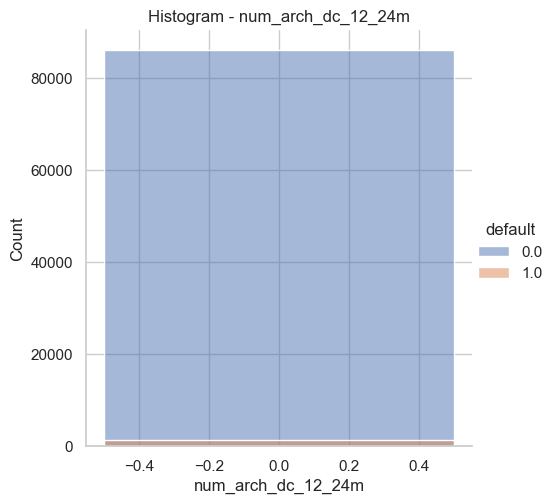

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

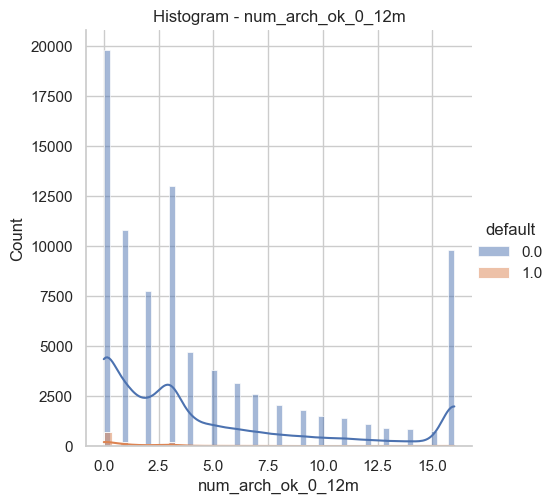

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

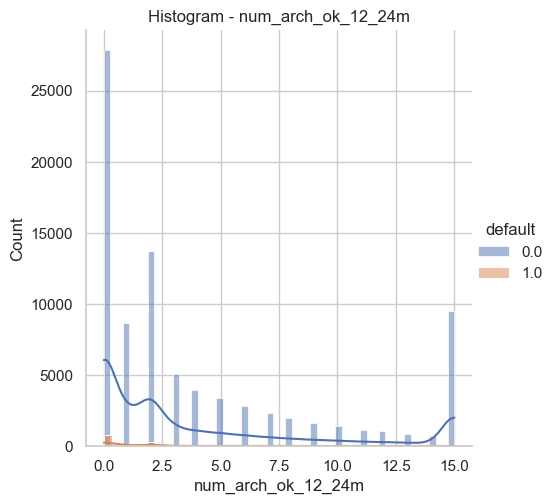

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

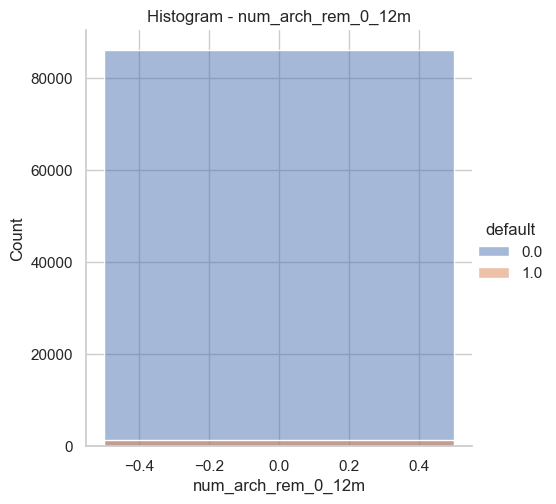

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

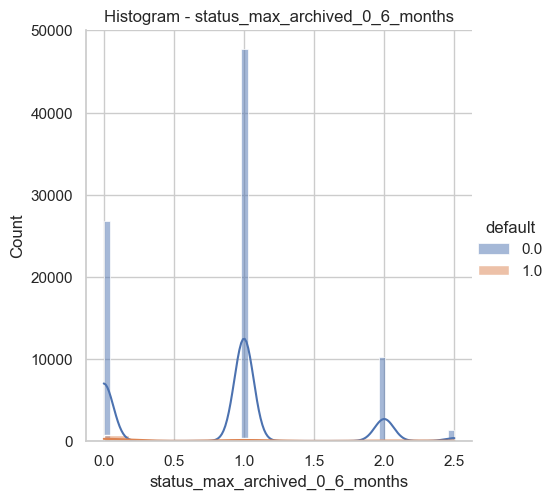

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

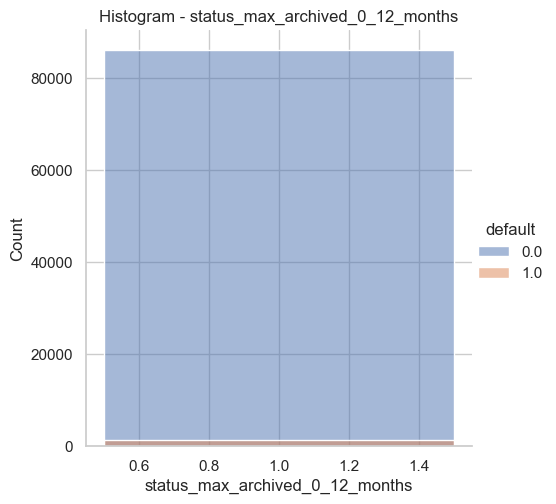

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

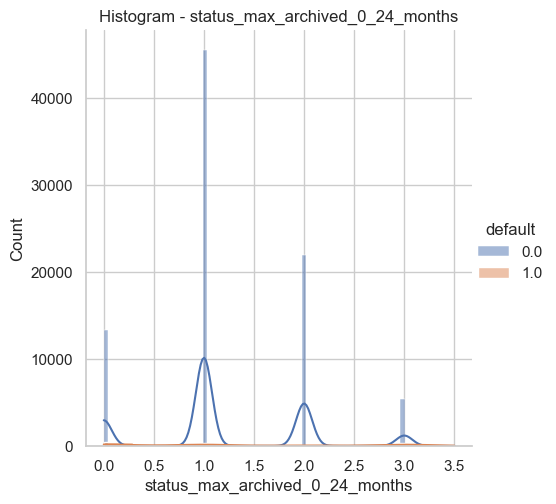

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

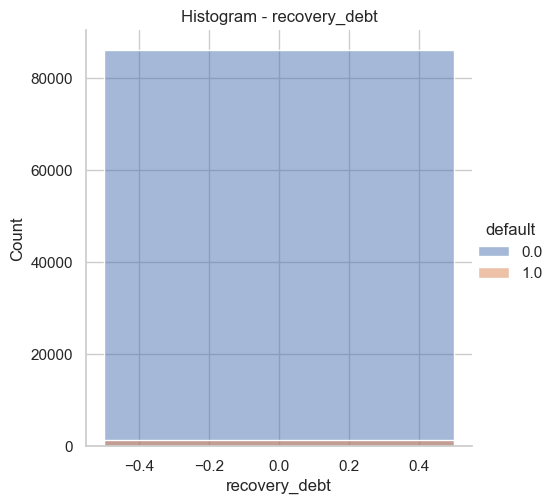

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

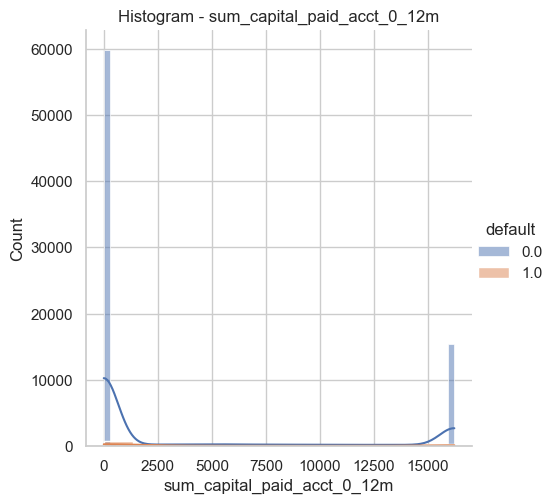

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

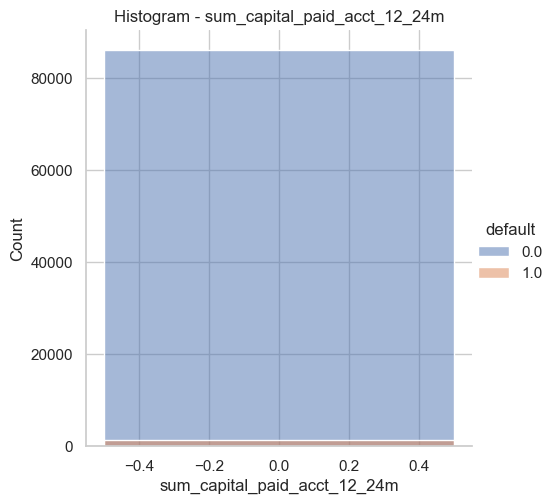

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

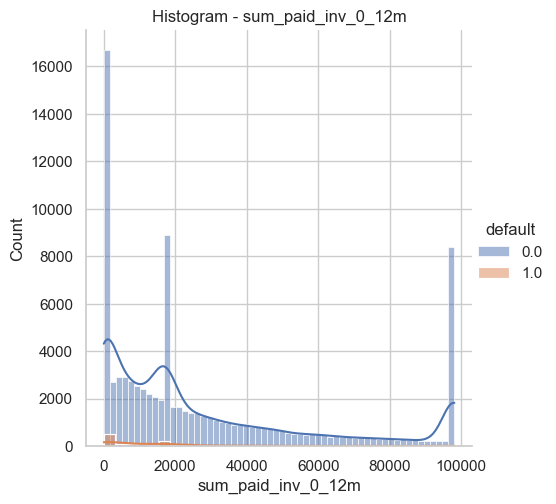

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

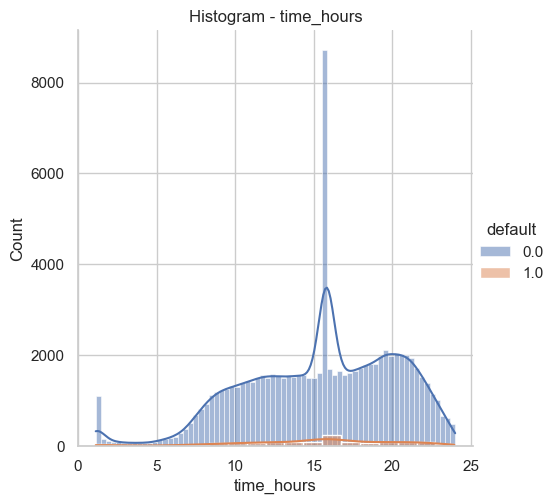

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

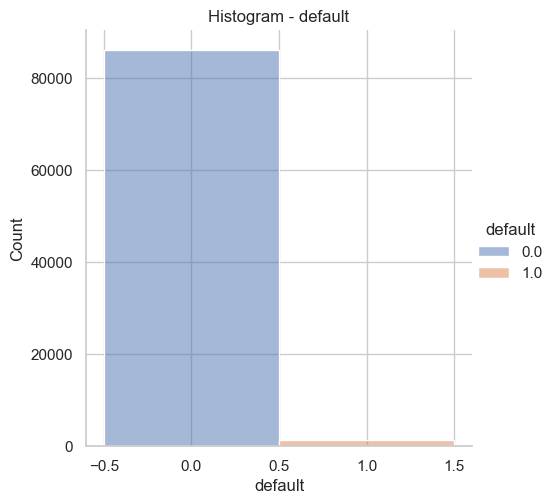

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

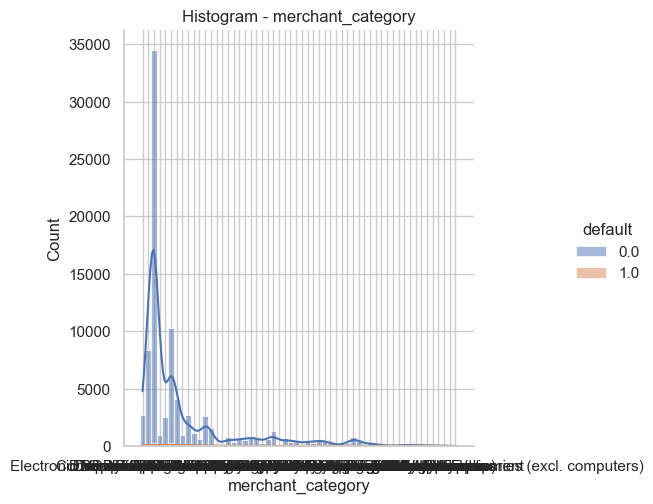

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

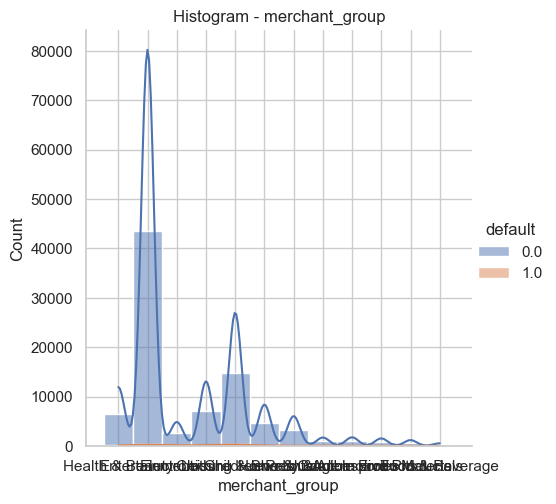

In [109]:
# Set the style
sns.set(style="whitegrid")

# Assuming df_updated is your DataFrame
# Get the list of feature names from the DataFrame (excluding the 'Cluster' column)
feature_names = df_updated.columns

# Plot individual histograms for each feature with hue="default"
for feature_name in feature_names:
    plt.figure(figsize=(8, 6))
    g = sns.FacetGrid(df_updated, hue="default", height=5)
    g.map(sns.histplot, feature_name, kde= True)
    g.add_legend(title="default")
    plt.title(f'Histogram - {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Count')
    plt.show()

In [110]:
concat_df.to_csv('data90.csv', index=False)